<a href="https://colab.research.google.com/github/saymrwulf/timeseries/blob/main/oho_yfinance_neural_forecasting_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Forecast with Raw Data

### Pre

In [1]:
!pip install yfinance neuralforecast
!pip install statsforecast ray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.8/256.8 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.6/275.6 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.1/319.1 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from neuralforecast import NeuralForecast
from neuralforecast.auto import AutoNHITS, AutoAutoformer, AutoPatchTST, AutoiTransformer, AutoFEDformer
from neuralforecast.losses.pytorch import MQLoss
from ray import tune
import yfinance as yf

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


### Test yfinance download

In [12]:
data = yf.download("AAPL", start="2015-01-01", end="2023-06-30")
data
aapl = yf.Ticker('AAPL')
aapl.balance_sheet

[*********************100%***********************]  1 of 1 completed


,2024-09-30,2023-09-30,2022-09-30,2021-09-30,2020-09-30
Treasury Shares Number,NaN,0.0,NaN,NaN,NaN
Ordinary Shares Number,15116786000.0,15550061000.0,15943425000.0,16426786000.0,NaN
Share Issued,15116786000.0,15550061000.0,15943425000.0,16426786000.0,NaN
Net Debt,76686000000.0,81123000000.0,96423000000.0,89779000000.0,NaN
Total Debt,106629000000.0,111088000000.0,132480000000.0,136522000000.0,NaN
...,...,...,...,...,...
Cash Cash Equivalents And Short Term Investments,65171000000.0,61555000000.0,48304000000.0,62639000000.0,NaN
Other Short Term Investments,35228000000.0,31590000000.0,24658000000.0,27699000000.0,NaN
Cash And Cash Equivalents,29943000000.0,29965000000.0,23646000000.0,34940000000.0,NaN
Cash Equivalents,2744000000.0,1606000000.0,5100000000.0,17635000000.0,NaN


### Yfinance full download

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

# Fetch data for multiple tickers
#tickers = ["AAPL", "GOOG", "MSFT"]
tickers = ["AMZN", "GOOGL", "MSFT", "BABA", "TCEHY", "ORCL", "CCJ", "DNN", "URG", "KAP", "NVDA", "AMD", "USO", "UCO", "UNG", "SREN.SW", "MUV2.DE", "RGA"]
data = yf.download(tickers, start="2015-01-01", end="2023-06-30")

# Reshape the data
df = data['Close']  # No need to unstack here

# Convert the Series to a DataFrame if it's not already (optional but recommended)
if isinstance(df, pd.Series):
    df = df.to_frame()

# Melt the dataframe to long format
hist = df.melt(ignore_index=False, var_name='Ticker', value_name='Close')
hist.reset_index(inplace=True)

print(hist)
hist.rename(columns={'Date': 'ds', 'Ticker': 'unique_id', 'Close':'y'}, inplace=True)
hist.head()

[*********************100%***********************]  18 of 18 completed


            Date Ticker      Close
0     2015-01-02    AMD   2.670000
1     2015-01-05    AMD   2.660000
2     2015-01-06    AMD   2.630000
3     2015-01-07    AMD   2.580000
4     2015-01-08    AMD   2.610000
...          ...    ...        ...
39469 2023-06-23    USO  62.419998
39470 2023-06-26    USO  62.730000
39471 2023-06-27    USO  61.299999
39472 2023-06-28    USO  62.520000
39473 2023-06-29    USO  62.959999

[39474 rows x 3 columns]


,ds,unique_id,y
0,2015-01-02,AMD,2.67
1,2015-01-05,AMD,2.66
2,2015-01-06,AMD,2.63
3,2015-01-07,AMD,2.58
4,2015-01-08,AMD,2.61


### Data Cleaning

In [25]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

def explore_and_clean_data(hist):
	# Show first 5 lines from every ticker
	display(hist.groupby('unique_id').head(5))

	# Forward-fill then back-fill the target column
	hist['y'] = hist.groupby('unique_id')['y'].ffill().bfill()

	# Create a simple diff column
	hist['diff'] = hist.groupby('unique_id')['y'].diff()

	# Option 1: fill any NaNs (typically the first row per ticker) with zero
	hist['diff'] = hist['diff'].fillna(0)

	# Show summary of diff stats
	print(hist['diff'].describe())

# Call the function
explore_and_clean_data(hist)

,ds,unique_id,y,diff
0,2015-01-02,AMD,2.670000,NaN
1,2015-01-05,AMD,2.660000,-0.010000
2,2015-01-06,AMD,2.630000,-0.030000
3,2015-01-07,AMD,2.580000,-0.050000
4,2015-01-08,AMD,2.610000,0.030000
2193,2015-01-02,AMZN,15.426000,NaN
2194,2015-01-05,AMZN,15.109500,-0.316500
2195,2015-01-06,AMZN,14.764500,-0.345000
2196,2015-01-07,AMZN,14.921000,0.156500
2197,2015-01-08,AMZN,15.023000,0.102000


count    39474.000000
mean         0.012833
std          3.205695
min        -79.375000
25%         -0.336383
50%          0.000000
75%          0.434586
max        341.925000
Name: diff, dtype: float64


### Training & Prediction AutoNHITS & AutoAutoFormer

In [5]:
import neuralforecast.losses.pytorch as NFL
print(dir(NFL))
from neuralforecast.auto import AutoNHITS, AutoAutoformer
from neuralforecast.losses.pytorch import MQLoss, HuberLoss
from ray import tune

['Accuracy', 'AffineTransform', 'BaseISQF', 'BasePointLoss', 'Bernoulli', 'Beta', 'Distribution', 'DistributionLoss', 'F', 'GMM', 'HuberLoss', 'HuberMQLoss', 'HuberQLoss', 'IQLoss', 'ISQF', 'MAE', 'MAPE', 'MASE', 'MQLoss', 'MSE', 'NBMM', 'NegativeBinomial', 'Normal', 'Optional', 'PMM', 'Poisson', 'QuantileLayer', 'QuantileLoss', 'RMSE', 'SMAPE', 'StudentT', 'TransformedDistribution', 'TukeyLoss', 'Tuple', 'Tweedie', 'Union', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_divide_no_nan', '_weighted_mean', 'bernoulli_domain_map', 'bernoulli_scale_decouple', 'constraints', 'est_alpha', 'est_beta', 'est_lambda', 'isqf_domain_map', 'isqf_scale_decouple', 'level_to_outputs', 'math', 'nbinomial_domain_map', 'nbinomial_scale_decouple', 'nn', 'normal_domain_map', 'normal_scale_decouple', 'np', 'partial', 'poisson_domain_map', 'poisson_scale_decouple', 'quantiles_to_outputs', 'relMSE', 'sCRPS', 'student_domain_map', 'student

In [20]:
config_nhits = {
    "input_size": tune.choice([48, 48*2, 48*3]),              # Length of input window
    "start_padding_enabled": True,
    "n_blocks": 5*[1],                                              # Length of input window
    "mlp_units": 5 * [[64, 64]],                                  # Length of input window
    "n_pool_kernel_size": tune.choice([5*[1], 5*[2], 5*[4],
                                      [8, 4, 2, 1, 1]]),            # MaxPooling Kernel size
    "n_freq_downsample": tune.choice([[8, 4, 2, 1, 1],
                                      [1, 1, 1, 1, 1]]),            # Interpolation expressivity ratios
    "learning_rate": tune.loguniform(1e-4, 1e-2),                   # Initial Learning rate
    "scaler_type": tune.choice([None]),                             # Scaler type
    "max_steps": tune.choice([1000]),                               # Max number of training iterations
    "batch_size": tune.choice([1, 4, 10]),                          # Number of series in batch
    "windows_batch_size": tune.choice([128, 256, 512]),             # Number of windows in batch
    "random_seed": tune.randint(1, 20),                             # Random seed
}

config_autoformer = {
    "input_size": tune.choice([48, 48*2, 48*3]),              # Length of input window
    "encoder_layers": tune.choice([2,4]),                     # Number of layers in Autoformer
    "learning_rate": tune.loguniform(1e-4, 1e-2),             # Initial Learning rate
    "scaler_type": tune.choice(['robust']),                   # Scaler type
    "max_steps": tune.choice([500, 1000]),                    # Max number of training iterations
    "batch_size": tune.choice([1, 4]),                        # Number of series in batch
    "random_seed": tune.randint(1, 20),                       # Random seed
}

In [26]:
nf = NeuralForecast(
    models=[
        #AutoAutoformer(h=48, config=config_autoformer, loss=MQLoss(), num_samples=2),
        AutoNHITS(h=48, config=config_nhits, loss=MQLoss(), num_samples=5),
    ],
    freq='B' # H=hourly  D=Day, B=BusinessDay usw.
)
nf.fit(df=hist)

2025-01-10 17:55:45,365	INFO worker.py:1821 -- Started a local Ray instance.
2025-01-10 17:55:47,039	INFO tune.py:253 -- Initializing Ray automatically. For cluster usage or custom Ray initialization, call `ray.init(...)` before `Tuner(...)`.


+--------------------------------------------------------------------+
| Configuration for experiment     _train_tune_2025-01-10_17-55-42   |
+--------------------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator             |
| Scheduler                        FIFOScheduler                     |
| Number of trials                 5                                 |
+--------------------------------------------------------------------+

View detailed results here: /root/ray_results/_train_tune_2025-01-10_17-55-42
To visualize your results with TensorBoard, run: `tensorboard --logdir /tmp/ray/session_2025-01-10_17-55-42_262464_201/artifacts/2025-01-10_17-55-47/_train_tune_2025-01-10_17-55-42/driver_artifacts`


(pid=8917) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
(pid=8917) Dask dataframe query planning is disabled because dask-expr is not installed.
(pid=8917) 
(pid=8917) You can install it with `pip install dask[dataframe]` or `conda install dask`.
(pid=8917) This will raise in a future version.
(pid=8917) 
(pid=8917)   warnings.warn(msg, FutureWarning)
(_train_tune pid=8917) /usr/local/lib/python3.10/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=8917) Seed set to 17
(_train_tune pid=8917) GPU available: True (cuda), used: True
(_train_tune pid=8917) TPU available: False, using: 0 TPU cores
(_train_tune pid=8917) HPU available: False, using: 0 HPUs
(_train_tune pid=8917) 2025-01-10 17:55:56.422218: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Epoch 5:   0%|          | 0/18 [00:00<?, ?it/s, v_num=0, train_loss_step=0.324, train_loss_epoch=1.820]
(_train_tune pid=8917) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/18 [00:00<?, ?it/s]
(_train_tune pid=8917) 
Validation DataLoader 0: 100%|██████████| 18/18 [00:00<00:00, 157.41it/s]
(_train_tune pid=8917) 
Epoch 11:   0%|          | 0/18 [00:00<?, ?it/s, v_num=0, train_loss_step=5.410, train_loss_epoch=1.930, valid_loss=2.880]
(_train_tune pid=8917) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/18 [00:00<?, ?it/s]
(_train_tune pid=8917) 
Epoch 16:   0%|          | 0/18 [00:00<?, ?it/s, v_num=0, train_loss_step=0.346, train_loss_epoch=1.780, valid_loss=2.750]
(_train_tune pid=8917) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/18 [00:00<?, ?it/s]
(_train_tune pid=8917) 
Epoch 22:   0%|          | 

(_train_tune pid=8917) `Trainer.fit` stopped: `max_steps=1000` reached.


(_train_tune pid=8917) 
Epoch 55:   0%|          | 0/18 [00:00<?, ?it/s, v_num=0, train_loss_step=2.280, train_loss_epoch=1.630, valid_loss=2.270]


(pid=9095) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
(pid=9095) Dask dataframe query planning is disabled because dask-expr is not installed.
(pid=9095) 
(pid=9095) You can install it with `pip install dask[dataframe]` or `conda install dask`.
(pid=9095) This will raise in a future version.
(pid=9095) 
(pid=9095)   warnings.warn(msg, FutureWarning)
(_train_tune pid=9095) /usr/local/lib/python3.10/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=9095) Seed set to 11
(_train_tune pid=9095) GPU available: True (cuda), used: True
(_train_tune pid=9095) TPU available: False, using: 0 TPU cores
(_train_tune pid=9095) HPU available: False, using: 0 HPUs
(_train_tune pid=9095) 2025-01-10 17:56:24.955879: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Epoch 19: 100%|██████████| 5/5 [00:00<00:00, 65.13it/s, v_num=0, train_loss_step=1.680, train_loss_epoch=1.760]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 5/5 [00:00<00:00, 152.48it/s]
(_train_tune pid=9095) 
Epoch 39: 100%|██████████| 5/5 [00:00<00:00, 60.19it/s, v_num=0, train_loss_step=4.150, train_loss_epoch=1.460, valid_loss=2.250]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/5 [00:00<?, ?it/s]
(_train_tune pid=9095) 
Epoch 59: 100%|██████████| 5/5 [00:00<00:00, 62.32it/s, v_num=0, train_loss_step=2.890, train_loss_epoch=1.910, valid_loss=2.210]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/5 [00:00<?, ?it/s]
(_train_tune pid=9095) 
Epoch 79: 100%|██████████| 5/5 [00:00<00:00, 79.08it/s, v_num=0, train_loss_step=1.580, train_loss_epoch=1.930, valid_loss=2.180]
Validation: |          | 0/? [00:00<?, 

(_train_tune pid=9095) `Trainer.fit` stopped: `max_steps=1000` reached.
(pid=9255) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
(pid=9255) Dask dataframe query planning is disabled because dask-expr is not installed.
(pid=9255) 
(pid=9255) You can install it with `pip install dask[dataframe]` or `conda install dask`.
(pid=9255) This will raise in a future version.
(pid=9255) 
(pid=9255)   warnings.warn(msg, FutureWarning)
(_train_tune pid=9255) /usr/local/lib/python3.10/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=9255) Seed set to 11
(_train_tune pid=9255) GPU available: True (cuda), used: True
(_train_tune pid=9255) TPU available: False, using: 0 TPU cores
(_train_tune pid=9255) HPU available: False, using: 0 HPUs
(_train_tune pid=9255) 2025-01-10 17:56:5

Sanity Checking DataLoader 0: 100%|██████████| 2/2 [00:00<00:00,  8.66it/s]
                                                                           
Epoch 19: 100%|██████████| 5/5 [00:00<00:00, 86.19it/s, v_num=0, train_loss_step=1.610, train_loss_epoch=1.630]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 5/5 [00:00<00:00, 209.61it/s]
(_train_tune pid=9255) 
                                                                       
Epoch 39: 100%|██████████| 5/5 [00:00<00:00, 78.51it/s, v_num=0, train_loss_step=3.930, train_loss_epoch=1.460, valid_loss=2.230]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 59: 100%|██████████| 5/5 [00:00<00:00, 51.21it/s, v_num=0, train_loss_step=2.820, train_loss_epoch=1.700, valid_loss=2.230]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 79: 100%|██████████| 5/5 [00:00<00:00, 53.37it/s, v_num=0, train_loss_step=1.690, train_loss_epoch=1.690, valid_loss=2.240]
Validation: |          | 0/? [00:00<?, ?

(_train_tune pid=9255) `Trainer.fit` stopped: `max_steps=1000` reached.
(pid=9417) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
(pid=9417) Dask dataframe query planning is disabled because dask-expr is not installed.
(pid=9417) 
(pid=9417) You can install it with `pip install dask[dataframe]` or `conda install dask`.
(pid=9417) This will raise in a future version.
(pid=9417) 
(pid=9417)   warnings.warn(msg, FutureWarning)
(_train_tune pid=9417) /usr/local/lib/python3.10/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=9417) Seed set to 15
(_train_tune pid=9417) GPU available: True (cuda), used: True
(_train_tune pid=9417) TPU available: False, using: 0 TPU cores
(_train_tune pid=9417) HPU available: False, using: 0 HPUs
(_train_tune pid=9417) 2025-01-10 17:57:1

Sanity Checking DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]
                                                                           
Epoch 19: 100%|██████████| 5/5 [00:00<00:00, 76.00it/s, v_num=0, train_loss_step=1.600, train_loss_epoch=1.700]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 39: 100%|██████████| 5/5 [00:00<00:00, 81.13it/s, v_num=0, train_loss_step=2.290, train_loss_epoch=1.690, valid_loss=2.320]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 59: 100%|██████████| 5/5 [00:00<00:00, 72.99it/s, v_num=0, train_loss_step=1.630, train_loss_epoch=1.420, valid_loss=2.260]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 79: 100%|██████████| 5/5 [00:00<00:00, 55.82it/s, v_num=0, train_loss_step=1.810, train_loss_epoch=1.590, valid_loss=2.220]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/5 [00:00<?, ?it/s]
(_train_tune pid=9417) 
Epoch 99: 100%|██████████| 5/5 [00:00<00:00, 47.54it/s, v_num=0, train_loss_step=0.

(_train_tune pid=9417) `Trainer.fit` stopped: `max_steps=1000` reached.
(pid=9580) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
(pid=9580) Dask dataframe query planning is disabled because dask-expr is not installed.
(pid=9580) 
(pid=9580) You can install it with `pip install dask[dataframe]` or `conda install dask`.
(pid=9580) This will raise in a future version.
(pid=9580) 
(pid=9580)   warnings.warn(msg, FutureWarning)
(_train_tune pid=9580) /usr/local/lib/python3.10/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=9580) Seed set to 7
(_train_tune pid=9580) GPU available: True (cuda), used: True
(_train_tune pid=9580) TPU available: False, using: 0 TPU cores
(_train_tune pid=9580) HPU available: False, using: 0 HPUs
(_train_tune pid=9580) 2025-01-10 17:57:44

Epoch 19: 100%|██████████| 5/5 [00:00<00:00, 80.67it/s, v_num=0, train_loss_step=1.690, train_loss_epoch=1.310]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 39: 100%|██████████| 5/5 [00:00<00:00, 75.28it/s, v_num=0, train_loss_step=0.770, train_loss_epoch=1.550, valid_loss=2.210]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 59: 100%|██████████| 5/5 [00:00<00:00, 72.72it/s, v_num=0, train_loss_step=1.260, train_loss_epoch=1.570, valid_loss=2.410]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 79: 100%|██████████| 5/5 [00:00<00:00, 80.21it/s, v_num=0, train_loss_step=1.330, train_loss_epoch=1.600, valid_loss=2.330]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 99: 100%|██████████| 5/5 [00:00<00:00, 54.15it/s, v_num=0, train_loss_step=3.880, train_loss_epoch=1.400, valid_loss=2.260]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/5 [00:00<?, ?it/s]
(_train_tune pid=9580) 
Epoch 119: 100%|██████████| 5/5 [00:00<00:00, 48.02

2025-01-10 17:58:02,434	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/root/ray_results/_train_tune_2025-01-10_17-55-42' in 0.0086s.
(_train_tune pid=9580) `Trainer.fit` stopped: `max_steps=1000` reached.
INFO:lightning_fabric.utilities.seed:Seed set to 11
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Epoch 199:   0%|          | 0/5 [00:00<?, ?it/s, v_num=0, train_loss_step=1.250, train_loss_epoch=1.680, valid_loss=2.170]

Epoch 199: 100%|██████████| 5/5 [00:00<00:00, 80.19it/s, v_num=0, train_loss_step=1.930, train_loss_epoch=1.680, valid_loss=2.170]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 199: 100%|██████████| 5/5 [00:00<00:00, 49.45it/s, v_num=0, train_loss_step=1.930, train_loss_epoch=1.490, valid_loss=2.270]


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MQLoss        | 5      | eval 
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 118 K  | train
-------------------------------------------------------
118 K     Trainable params
5         Non-trainable params
118 K     Total params
0.473     Total estimated model params size (MB)
39        Modules in train mode
1         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1000` reached.


#### Prediction

In [27]:
fcst_df = nf.predict()
fcst_df.columns = fcst_df.columns.str.replace('-median', '')
fcst_df.head()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

,unique_id,ds,AutoNHITS,AutoNHITS-lo-90,AutoNHITS-lo-80,AutoNHITS-hi-80,AutoNHITS-hi-90
0,AMD,2023-06-30,111.454109,103.558571,105.977913,116.242310,118.696014
1,AMD,2023-07-03,111.462448,102.947815,105.427971,116.756081,119.216034
2,AMD,2023-07-04,111.484924,101.604530,104.226799,117.828773,120.420059
3,AMD,2023-07-05,111.492851,100.620773,103.487946,118.490913,121.390228
4,AMD,2023-07-06,111.537239,99.450470,102.841850,119.044945,122.283073


In [28]:
print("Forecast Data Unique IDs:", fcst_df['unique_id'].unique())
print("Forecast DataFrame columns:", fcst_df.columns)

Forecast Data Unique IDs: ['AMD' 'AMZN' 'BABA' 'CCJ' 'DNN' 'GOOGL' 'KAP' 'MSFT' 'MUV2.DE' 'NVDA'
 'ORCL' 'RGA' 'SREN.SW' 'TCEHY' 'UCO' 'UNG' 'URG' 'USO']
Forecast DataFrame columns: Index(['unique_id', 'ds', 'AutoNHITS', 'AutoNHITS-lo-90', 'AutoNHITS-lo-80', 'AutoNHITS-hi-80',
       'AutoNHITS-hi-90'],
      dtype='object')


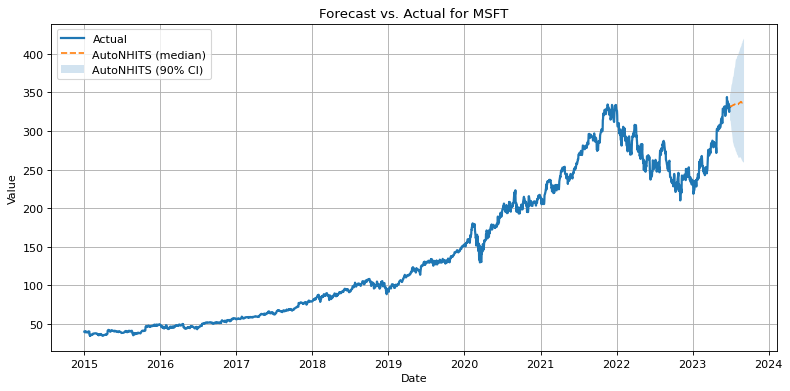

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

this_ticker = "MSFT"

# Filter historical data for just this ticker
hist_one = hist[hist['unique_id'] == this_ticker].copy()

# Filter the forecast data
fcst_one = fcst_df[fcst_df['unique_id'] == this_ticker].copy()

# Merge them on ['unique_id', 'ds']
df_merge = pd.merge(hist_one, fcst_one, on=['unique_id', 'ds'], how='outer')
df_merge.sort_values('ds', inplace=True)

plt.figure(figsize=(10,5), dpi=80)

# Plot the actual series
plt.plot(df_merge['ds'], df_merge['y'], label='Actual', linewidth=2)

# Plot AutoAutoformer
#plt.plot(df_merge['ds'], df_merge['AutoAutoformer'],
#	label='AutoAutoformer (median)', linestyle='--')
#plt.fill_between(
#	df_merge['ds'],
#	df_merge['AutoAutoformer-lo-90'],
#	df_merge['AutoAutoformer-hi-90'],
#	alpha=0.2,
#	label='AutoAutoformer (90% CI)'
#)

# Plot AutoNHITS
plt.plot(df_merge['ds'], df_merge['AutoNHITS'],
	label='AutoNHITS (median)', linestyle='--')
plt.fill_between(
	df_merge['ds'],
	df_merge['AutoNHITS-lo-90'],
	df_merge['AutoNHITS-hi-90'],
	alpha=0.2,
	label='AutoNHITS (90% CI)'
)

plt.title(f'Forecast vs. Actual for {this_ticker}')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

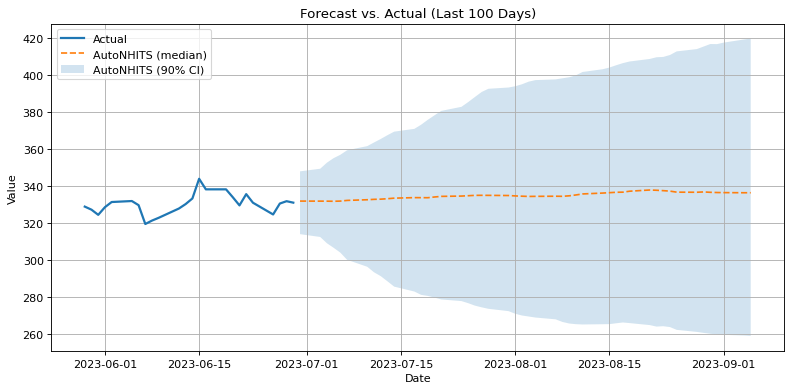

In [31]:
import datetime as dt

# 1) Figure out the cutoff date, 100 days before the max 'ds'
cutoff = df_merge['ds'].max() - dt.timedelta(days=100)

# 2) Filter to only show data after (or on) that date
df_merge_100d = df_merge[df_merge['ds'] >= cutoff].copy()

# 3) Plot the same lines/confidence intervals
plt.figure(figsize=(10,5), dpi=80)
plt.plot(df_merge_100d['ds'], df_merge_100d['y'], label='Actual', linewidth=2)

# Plot AutoAutoformer
#plt.plot(df_merge_100d['ds'], df_merge_100d['AutoAutoformer'],
#	label='AutoAutoformer (median)', linestyle='--')
#plt.fill_between(
#	df_merge_100d['ds'],
#	df_merge_100d['AutoAutoformer-lo-90'],
#	df_merge_100d['AutoAutoformer-hi-90'],
#	alpha=0.2,
#	label='AutoAutoformer (90% CI)'
#)

# Plot AutoNHITS
plt.plot(df_merge_100d['ds'], df_merge_100d['AutoNHITS'],
	label='AutoNHITS (median)', linestyle='--')
plt.fill_between(
	df_merge_100d['ds'],
	df_merge_100d['AutoNHITS-lo-90'],
	df_merge_100d['AutoNHITS-hi-90'],
	alpha=0.2,
	label='AutoNHITS (90% CI)'
)

plt.title('Forecast vs. Actual (Last 100 Days)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

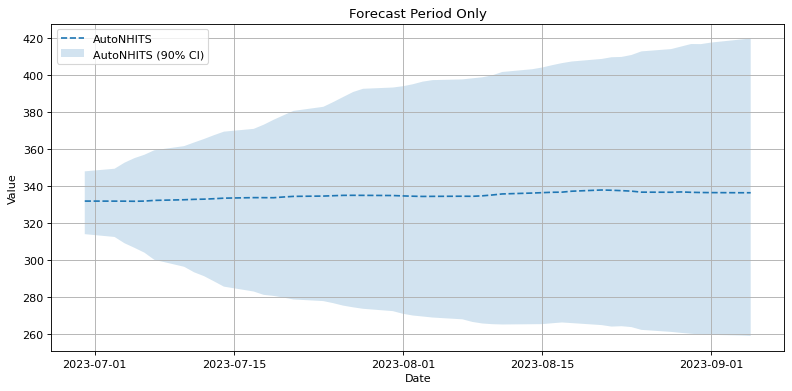

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Suppose this is your last known historical date
last_hist_date = hist_one['ds'].max()

# Filter df_merge to only show forecast dates
df_fcst_only = df_merge[df_merge['ds'] > last_hist_date].copy()

# Plot
plt.figure(figsize=(10, 5), dpi=80)
#plt.plot(df_fcst_only['ds'], df_fcst_only['AutoAutoformer'], label='AutoAutoformer', linestyle='--')
#plt.fill_between(
#	df_fcst_only['ds'],
#	df_fcst_only['AutoAutoformer-lo-90'],
#	df_fcst_only['AutoAutoformer-hi-90'],
#	alpha=0.2, label='AutoAutoformer (90% CI)'
#)

plt.plot(df_fcst_only['ds'], df_fcst_only['AutoNHITS'], label='AutoNHITS', linestyle='--')
plt.fill_between(
	df_fcst_only['ds'],
	df_fcst_only['AutoNHITS-lo-90'],
	df_fcst_only['AutoNHITS-hi-90'],
	alpha=0.2, label='AutoNHITS (90% CI)'
)

plt.title('Forecast Period Only')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Prediction Perfomance Advanced (with Buy-Sell-Hold)

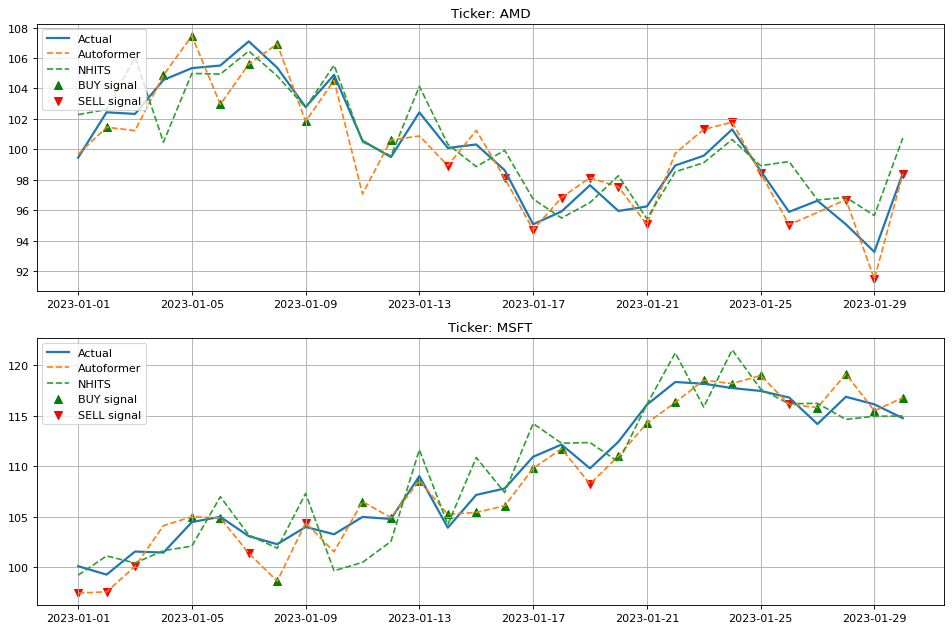

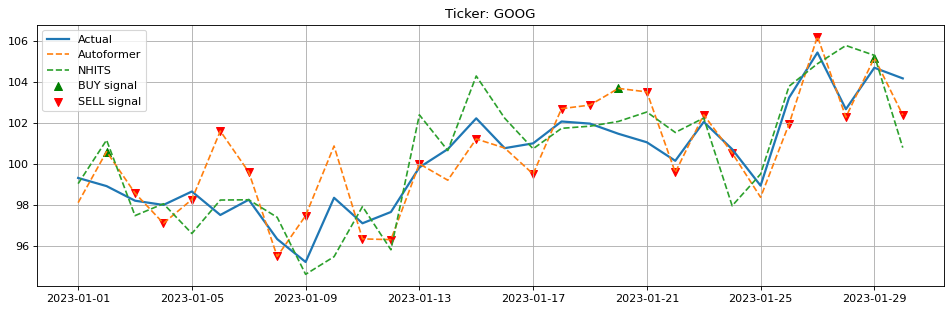

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def naive_signal(df, forecast_col='Autoformer', threshold=0.5):
    """
    Given a DataFrame `df` with columns 'ds' and a forecast column (e.g. 'Autoformer'),
    compute the day-to-day difference in forecast and return a naive Buy/Sell/Hold signal
    based on a threshold.
    """
    # Sort by ds to ensure correct temporal ordering
    df = df.sort_values('ds').copy()

    # Compute day-to-day difference in the forecast
    df['forecast_diff'] = df[forecast_col].diff()

    # Conditions
    cond_buy  = df['forecast_diff'] > threshold
    cond_sell = df['forecast_diff'] < -threshold

    # np.select for 3-state logic
    df['Signal'] = np.select(
        [cond_buy, cond_sell],
        ['BUY', 'SELL'],
        default='HOLD'
    )
    return df

def plot_in_subplots(fcst_df, model_cols, max_per_page=4, dpi=80):
    """
    Create subplots for up to `max_per_page` tickers at a time, plotting
    actual data vs. multiple forecast model columns, plus optional signals.

    fcst_df must have columns:
      - 'unique_id' (ticker)
      - 'ds' (date/time)
      - 'y' (actual)
      - each forecast model in `model_cols`
      - optionally 'Signal' for buy/hold/sell (plotting is up to you)
    """
    unique_ids = fcst_df['unique_id'].unique()
    n_tickers = len(unique_ids)

    start_idx = 0
    while start_idx < n_tickers:
        end_idx = min(start_idx + max_per_page, n_tickers)
        page_ids = unique_ids[start_idx:end_idx]

        fig, axes = plt.subplots(len(page_ids), 1,
                                 figsize=(12, 4 * len(page_ids)),
                                 dpi=dpi, sharex=False)

        # If there's only 1 row
        if len(page_ids) == 1:
            axes = [axes]

        for ax, uid in zip(axes, page_ids):
            df_one = fcst_df.loc[fcst_df['unique_id'] == uid].copy()
            df_one.sort_values('ds', inplace=True)

            # Plot actual
            ax.plot(df_one['ds'], df_one['y'], label='Actual', linewidth=2)

            # Plot each model
            for mc in model_cols:
                if mc in df_one.columns:
                    ax.plot(df_one['ds'], df_one[mc], label=mc, linestyle='--')

            # (Optional) If we have a 'Signal' column, we can annotate:
            if 'Signal' in df_one.columns:
                # Example: mark each BUY date with a green arrow, SELL with red arrow
                # This is just a quick example of how to annotate.
                buys = df_one[df_one['Signal'] == 'BUY']
                sells = df_one[df_one['Signal'] == 'SELL']
                ax.scatter(buys['ds'], buys[model_cols[0]], marker='^', color='green', s=50, label='BUY signal')
                ax.scatter(sells['ds'], sells[model_cols[0]], marker='v', color='red', s=50, label='SELL signal')

            ax.set_title(f"Ticker: {uid}")
            ax.grid(True)
            ax.legend(loc='upper left')

        plt.tight_layout()
        plt.show()

        start_idx = end_idx

# --- SAMPLE DATA SETUP ---
# In real usage, you'd have your actual fcst_df from Nixtla: columns = [unique_id, ds, y, Autoformer, NHITS, ...]

# For demonstration, let's build minimal “fake” data:
dates = pd.date_range(start='2023-01-01', periods=30, freq='D')
tickers = ['AMD', 'GOOG', 'MSFT']
rows = []
for tkr in tickers:
    # Generate a simple 'y' with random walk
    y_values = 100 + np.cumsum(np.random.randn(len(dates))) * 2
    # Generate 2 forecast columns with slight variations
    autoformer_vals = y_values + np.random.randn(len(dates)) * 1.5
    nhits_vals = y_values + np.random.randn(len(dates)) * 1.5

    for d, yv, afv, nhv in zip(dates, y_values, autoformer_vals, nhits_vals):
        rows.append((tkr, d, yv, afv, nhv))

fcst_df_example = pd.DataFrame(rows, columns=['unique_id', 'ds', 'y', 'Autoformer', 'NHITS'])

# (Optional) Compute signals on one of the model columns:
fcst_df_example = naive_signal(fcst_df_example, forecast_col='Autoformer', threshold=1.0)

# Plot them in subplots
plot_in_subplots(
    fcst_df=fcst_df_example,
    model_cols=['Autoformer', 'NHITS'],
    max_per_page=2,  # Show 2 tickers per “page”
    dpi=80
)

# --- END CELL ---

### M6 Metrics

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

IN-SAMPLE predictions from NF:
  unique_id         ds     cutoff  AutoNHITS-median  AutoNHITS-lo-90  AutoNHITS-lo-80  \
0       AMD 2015-02-18 2015-02-17          0.001595        -0.015110        -0.027794   
1       AMD 2015-02-19 2015-02-17          0.003760        -0.027323        -0.028392   
2       AMD 2015-02-20 2015-02-17          0.004620        -0.049644        -0.033781   
3       AMD 2015-02-23 2015-02-17         -0.005302        -0.042194        -0.034433   
4       AMD 2015-02-24 2015-02-17         -0.011553        -0.031579        -0.027099   
5       AMD 2015-02-25 2015-02-17         -0.011222        -0.041203        -0.031481   
6       AMD 2015-02-26 2015-02-17         -0.009347        -0.041097        -0.042789   
7       AMD 2015-02-27 2015-02-17         -0.014566        -0.027943        -0.042286   
8       AMD 2015-03-02 2015-02-17         -0.032829        -0.007215        -0.033823   
9       AMD 2015-03-03 2015-02-17         -0.035822        -0.015774        -0.

<ipython-input-35-36ad030c21d2>:109: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sub = sub.groupby('unique_id', group_keys=False).apply(add_ret)
<ipython-input-35-36ad030c21d2>:109: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sub = sub.groupby('unique_id', group_keys=False).apply(add_ret)
<ipython-input-35-36ad030c21d2>:109: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. Th

AutoNHITS-lo-80     |  790.123    11.959    21.460    -0.005
AutoNHITS-hi-80     |  819.791    11.089    20.104    0.006
AutoNHITS-hi-90     |  951.054    13.662    23.989    0.010


<ipython-input-35-36ad030c21d2>:109: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sub = sub.groupby('unique_id', group_keys=False).apply(add_ret)
<ipython-input-35-36ad030c21d2>:109: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sub = sub.groupby('unique_id', group_keys=False).apply(add_ret)
<ipython-input-35-36ad030c21d2>:109: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. Th

Naive               |  462.581     8.575    12.826    0.011


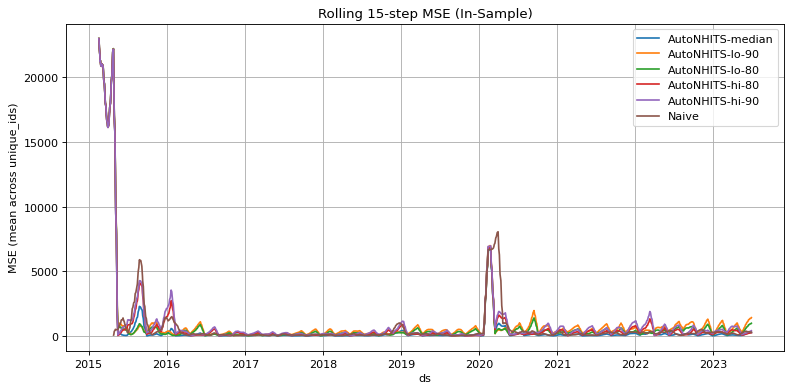

In [35]:
###################################################
# Compare AutoAutoformer, AutoNHITS, vs. Naive
# USING IN-SAMPLE PREDICTIONS to avoid empty merges
###################################################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from sklearn.metrics import mean_absolute_error, mean_squared_error

###############################
# 1) CALL nf.predict_insample(...) INSTEAD OF nf.predict()
###############################
# Example:
#    horizon = 48    # or 12, or 24, etc.
#    step_size = horizon
#    fcst_insample = nf.predict_insample(step_size=step_size)
#
# Make sure your nf object is fitted: nf.fit(hist)
# And that freq=... matches your actual data.
###############################
horizon = 48  # or adjust as needed
step_size = horizon
fcst_insample = nf.predict_insample(step_size=step_size)

# If it’s a MultiIndex, flatten it
if isinstance(fcst_insample.index, pd.MultiIndex):
    fcst_insample = fcst_insample.reset_index()

print("IN-SAMPLE predictions from NF:")
print(fcst_insample.head(10))

###############################
# 2) Build a naive baseline for the SAME in-sample timestamps
###############################
def make_naive_in_sample(df: pd.DataFrame, horizon: int=48) -> pd.DataFrame:
    """
    For each unique_id's time series, create an in-sample naive forecast by
    shifting 'y' down by 'horizon' steps. That means the naive forecast at time t
    is just the actual value at time t - horizon.
    """
    # Expect columns: [unique_id, ds, y, ...]
    all_out = []
    for uid, g in df.groupby('unique_id', group_keys=False):
        g = g.sort_values('ds').copy()
        g['Naive'] = g['y'].shift(horizon)
        all_out.append(g)
    return pd.concat(all_out).sort_values(['unique_id','ds'])

###############################
# 2a) We must *also* have the same columns in fcst_insample
#     Typically, nf.predict_insample returns: [unique_id, ds, y, <model cols> ...]
###############################
# Ensure we have columns named "unique_id", "ds", "y"
if not {'unique_id','ds','y'}.issubset(fcst_insample.columns):
    raise ValueError("Your fcst_insample lacks some of [unique_id, ds, y]. "
                     "Check nf.predict_insample output columns.")

# Create naive
df_naive = make_naive_in_sample(fcst_insample, horizon=horizon)

###############################
# 3) Merge the naive forecast column into fcst_insample
###############################
df_eval = fcst_insample.merge(
    df_naive[['unique_id','ds','Naive']],
    on=['unique_id','ds'],
    how='left'
)

print("\nMerged in-sample DataFrame (with naive baseline):")
print(df_eval.head())

# If STILL empty, it likely means your horizon is too large for your data length,
# so there's no overlap after shifting.
# Another cause is freq mismatch: if your data isn't actually 'H',
# you might not have consistent hourly steps.
# Adjust 'freq=...' or reduce horizon.

###############################
# 4) Compute metrics for each model + Naive
###############################
def smape(y_true, y_pred):
    return 100.0 * np.mean(2.0 * np.abs(y_true - y_pred)
                           / (np.abs(y_true) + np.abs(y_pred)))

def compute_metrics(df: pd.DataFrame, model_col: str) -> tuple:
    """ Return (MSE, MAE, sMAPE, SpearmanCorrOnReturns). """
    # Filter to rows with no missing
    sub = df.dropna(subset=['y', model_col])
    if len(sub) == 0:
        return (np.nan, np.nan, np.nan, np.nan)

    y_true = sub['y'].to_numpy()
    y_pred = sub[model_col].to_numpy()

    mse_  = mean_squared_error(y_true, y_pred)
    mae_  = mean_absolute_error(y_true, y_pred)
    smape_ = smape(y_true, y_pred)

    # Spearman on returns
    # We can't just do sub['y'].pct_change() globally, because sub has multiple series
    # So we group by unique_id
    sub = sub.sort_values(['unique_id','ds']).copy()
    def add_ret(g):
        g['ret_true'] = g['y'].pct_change()
        g['ret_pred'] = g[model_col].pct_change()
        return g
    sub = sub.groupby('unique_id', group_keys=False).apply(add_ret)

    # Drop rows where returns are NaN
    sub = sub.dropna(subset=['ret_true','ret_pred'])
    if len(sub) == 0:
        spear_ = np.nan
    else:
        spear_ = spearmanr(sub['ret_true'], sub['ret_pred']).correlation

    return mse_, mae_, smape_, spear_

models_in_df = [c for c in df_eval.columns if c.startswith('Auto') or c=='Naive']
print(f"\nFound these forecast columns: {models_in_df}")

print("\n--- In-sample Metrics Summary ---")
print("Model               |   MSE     MAE     sMAPE(%)   Spearman_R")

for mcol in models_in_df:
    mse_, mae_, smape_, spear_ = compute_metrics(df_eval, mcol)
    print(f"{mcol:20s}| {mse_:8.3f}  {mae_:8.3f}  {smape_:8.3f}    {spear_:.3f}")

###############################
# 5) Plot a rolling MSE vs time
###############################
def rolling_mse_over_time(df_input, model_col, window=30):
    """
    Combine all unique_ids, group by ds, compute mean squared error across tickers,
    then do a rolling(...) on ds. We'll do an integer-based rolling in sorted order.
    """
    sub = df_input.dropna(subset=['y', model_col]).copy()
    sub['err_sq'] = (sub['y'] - sub[model_col])**2

    # Average by ds
    daily = sub.groupby('ds', as_index=False)['err_sq'].mean().sort_values('ds')
    daily['rolling_mse'] = daily['err_sq'].rolling(window=window, min_periods=1).mean()
    daily['model'] = model_col
    return daily[['ds','model','rolling_mse']]

window_size = 15  # or 30, etc.

list_dfs = []
for mcol in models_in_df:
    temp = rolling_mse_over_time(df_eval, mcol, window=window_size)
    list_dfs.append(temp)

df_timeplot = pd.concat(list_dfs, ignore_index=True)

plt.figure(figsize=(10,5), dpi=80)
for mcol in models_in_df:
    sub = df_timeplot[df_timeplot['model'] == mcol]
    plt.plot(sub['ds'], sub['rolling_mse'], label=mcol)

plt.title(f"Rolling {window_size}-step MSE (In-Sample)")
plt.xlabel("ds")
plt.ylabel("MSE (mean across unique_ids)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

###############################################################################
# 0) We assume you already have df_eval: a DataFrame with columns at least:
#       ["unique_id", "ds", "y", ...one or more forecast columns...]
#    E.g. df_eval = pd.read_csv("my_forecast_evals.csv")
###############################################################################

# Quick check
required_cols = {"unique_id","ds","y"}
if not required_cols.issubset(df_eval.columns):
    raise ValueError(f"df_eval must contain at least {required_cols}.")

# Sort for consistent ordering
df_eval.sort_values(by=["unique_id", "ds"], inplace=True)

###############################################################################
# 1) Compute Metrics: MSE, MAE, sMAPE, Spearman R
###############################################################################
def compute_metrics(sub_df, model_col):
    """
    Given a sub-dataframe with columns ['y', model_col],
    compute MSE, MAE, sMAPE, and Spearman correlation.
    Return (mse, mae, smape, spearman_r).
    """
    y_true = sub_df['y'].values
    y_pred = sub_df[model_col].values

    # 1) MSE
    mse_ = np.mean((y_true - y_pred) ** 2)

    # 2) MAE
    mae_ = np.mean(np.abs(y_true - y_pred))

    # 3) sMAPE
    denom = np.abs(y_true) + np.abs(y_pred)
    smape_ = np.mean(
        np.where(denom != 0, 2.0 * np.abs(y_true - y_pred) / denom, 0)
    ) * 100

    # 4) Spearman correlation (directly on the series)
    try:
        corr, _ = spearmanr(y_true, y_pred)
    except ValueError:
        corr = np.nan

    return mse_, mae_, smape_, corr

###############################################################################
# 2) Summarize all models in a table
###############################################################################
# Identify model columns (everything except unique_id, ds, y)
skip_cols = {"unique_id", "ds", "y"}
model_cols = [c for c in df_eval.columns if c not in skip_cols]

metrics_result = []
for mcol in model_cols:
    sub = df_eval.dropna(subset=["y", mcol])
    if len(sub) == 0:
        print(f"[WARN] Model '{mcol}' has no valid rows (all NaN?), skipping.")
        continue
    mse_, mae_, smape_, spear_ = compute_metrics(sub, mcol)
    metrics_result.append((mcol, mse_, mae_, smape_, spear_))

# Print a summary table
print("\n--- Overall Metrics Summary ---")
print("Model          |   MSE       MAE      sMAPE(%)   Spearman_R")
for (mcol, mse_, mae_, smape_, spear_) in metrics_result:
    print(f"{mcol:14s}| {mse_:9.3f} {mae_:9.3f} {smape_:11.3f}   {spear_:10.3f}")

###############################################################################
# 3) Rolling MSE over time, ZOOM in on last 100 days
###############################################################################
ROLL_WINDOW = 14
ZOOM_DAYS = 100

def add_rolling_mse(df, model_col, window=14):
    """
    For each unique_id, compute the rolling MSE vs. y over 'window' rows.
    We'll store it in a new column: f'rollingMSE_{model_col}'.
    """
    def _roll_fn(sub):
        errs = (sub['y'] - sub[model_col])**2
        rolling_mse = errs.rolling(window=window, min_periods=1).mean()
        sub[f'rollingMSE_{model_col}'] = rolling_mse
        return sub

    return df.groupby("unique_id", group_keys=False).apply(_roll_fn)

# Compute rolling MSE for each model
for mcol in model_cols:
    df_eval = add_rolling_mse(df_eval, mcol, window=ROLL_WINDOW)

# For demonstration, pick one stock_of_interest
stock_of_interest = df_eval['unique_id'].iloc[0]  # or e.g. "AAPL"
# Zoom in on last ZOOM_DAYS for that stock
sub_stock = df_eval[df_eval['unique_id'] == stock_of_interest].copy()
sub_stock_zoom = sub_stock.iloc[-ZOOM_DAYS:].copy()

plt.figure(figsize=(10, 5))
for mcol in model_cols:
    colname = f'rollingMSE_{mcol}'
    if colname not in sub_stock_zoom.columns:
        continue
    plt.plot(sub_stock_zoom['ds'], sub_stock_zoom[colname], label=mcol)

plt.title(f"Rolling {ROLL_WINDOW}-day MSE (last {ZOOM_DAYS} days) - {stock_of_interest}")
plt.xlabel("Date")
plt.ylabel("Rolling MSE")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

###############################################################################
# 4) Separate charts for each metric's “winner”
###############################################################################
df_metrics = pd.DataFrame(metrics_result, columns=["model","mse","mae","smape","spearman"])
if len(df_metrics) > 0:
    best_mse_model    = df_metrics.loc[df_metrics['mse'].idxmin(),"model"]
    best_mae_model    = df_metrics.loc[df_metrics['mae'].idxmin(),"model"]
    best_smape_model  = df_metrics.loc[df_metrics['smape'].idxmin(),"model"]
    best_spear_model  = df_metrics.loc[df_metrics['spearman'].idxmax(),"model"]

    winners = {
        "Best_MSE"     : best_mse_model,
        "Best_MAE"     : best_mae_model,
        "Best_sMAPE"   : best_smape_model,
        "Best_Spearman": best_spear_model
    }
    print("\nWinners per metric:", winners)

    # We'll compare them in the last ZOOM_DAYS for stock_of_interest
    for metric_label, winner_name in winners.items():
        if winner_name not in model_cols:
            continue  # skip if some weird data
        plt.figure(figsize=(10, 5))
        # Plot actual y
        plt.plot(sub_stock_zoom['ds'], sub_stock_zoom['y'], label="Actual (y)", c='black', linewidth=2)

        # Plot the winner
        plt.plot(sub_stock_zoom['ds'], sub_stock_zoom[winner_name],
                 label=f"{winner_name} (Winner of {metric_label})",
                 linestyle='--', linewidth=2)

        # Plot the other models in a lighter style
        for mcol in model_cols:
            if mcol == winner_name:
                continue
            plt.plot(sub_stock_zoom['ds'], sub_stock_zoom[mcol],
                     label=mcol, linestyle=':', alpha=0.5)

        plt.title(f"Comparison vs. Winner of {metric_label}\n"
                  f"{stock_of_interest} (Last {ZOOM_DAYS} days)")
        plt.xlabel("Date")
        plt.ylabel("Forecast/Actual")
        plt.legend(loc='upper left', bbox_to_anchor=(1,1))
        plt.grid(True)
        plt.tight_layout()
        plt.show()

else:
    print("\n[INFO] No metrics to show. Possibly all model columns were empty?")

# ================== SINGLE CODE CELL ENDS HERE ==================

UFuncTypeError: ufunc 'subtract' cannot use operands with types dtype('float32') and dtype('<M8[ns]')

# AutoModels Training

In [86]:
# ================== SINGLE CODE CELL START ==================
import ray
from ray import tune

import numpy as np
import pandas as pd

# Nixtla's NeuralForecast
from neuralforecast import NeuralForecast
from neuralforecast.losses.pytorch import MQLoss, HuberLoss
from neuralforecast.auto import (
    AutoNHITS,
    AutoAutoformer,
    AutoPatchTST,
    AutoFEDformer,
    AutoiTransformer
)

############################################
# 0) The DataFrame 'hist' must be defined:
#    hist must have columns [unique_id, ds, y].
############################################
assert isinstance(hist, pd.DataFrame), "hist must be a DataFrame."
for req_col in ['unique_id', 'ds', 'y']:
    assert req_col in hist.columns, f"hist missing required column: {req_col}"

############################################
# 1) 'Knob': quick_mode to shorten runtime
############################################
quick_mode = True  # Set to False if you want full-blown search

if quick_mode:
    # Example: drastically reduce max_steps and reduce num_samples.
    # Also reduce horizon or other parameters if desired.
    MAX_STEPS_NHITS    = tune.choice([10, 20])   # Very small for demonstration
    MAX_STEPS_AUTOFORM = tune.choice([10, 20])
    MAX_STEPS_PATCHTST = tune.choice([10, 20])
    MAX_STEPS_FEDFORM  = tune.choice([10, 20])
    MAX_STEPS_ITRANS   = tune.choice([10, 20])
    # We'll only do 1 or 2 random samples per model
    NHITS_SAMPLES      = 2
    AUTOFORM_SAMPLES   = 2
    PATCHTST_SAMPLES   = 2
    FEDFORM_SAMPLES    = 1
    ITRANS_SAMPLES     = 1
    # Time limit for Ray tune in seconds
    TOTAL_TIME_LIMIT_S = 120
else:
    # Normal, bigger search
    MAX_STEPS_NHITS    = tune.choice([500, 1000])
    MAX_STEPS_AUTOFORM = tune.choice([500, 1000])
    MAX_STEPS_PATCHTST = tune.choice([500, 1000])
    MAX_STEPS_FEDFORM  = tune.choice([500, 1000])
    MAX_STEPS_ITRANS   = tune.choice([500, 1000])
    NHITS_SAMPLES      = 5
    AUTOFORM_SAMPLES   = 2
    PATCHTST_SAMPLES   = 2
    FEDFORM_SAMPLES    = 2
    ITRANS_SAMPLES     = 2
    TOTAL_TIME_LIMIT_S = 1800  # e.g. 30 min

############################################
# 2) Configure each model with tune.choices
############################################
config_nhits = {
    "input_size":               tune.choice([48, 96, 144]),
    "start_padding_enabled":    True,
    "n_blocks":                 5*[1],             # or tune.choice(...) if you want
    "mlp_units":                5 * [[64, 64]],    # remains constant
    "n_pool_kernel_size":       tune.choice([5*[1], 5*[2], 5*[4], [8,4,2,1,1]]),
    "n_freq_downsample":        tune.choice([[8,4,2,1,1], [1,1,1,1,1]]),
    "learning_rate":            tune.loguniform(1e-4, 1e-2),
    "scaler_type":              tune.choice([None]),
    "max_steps":                MAX_STEPS_NHITS,
    "batch_size":               tune.choice([1, 4, 8]),
    "windows_batch_size":       tune.choice([128, 256]),
    "random_seed":              tune.randint(1, 20),
}

config_autoformer = {
    "input_size":       tune.choice([48, 96, 144]),
    "encoder_layers":   tune.choice([2, 4]),
    "learning_rate":    tune.loguniform(1e-4, 1e-2),
    "scaler_type":      tune.choice(['robust']),
    "max_steps":        MAX_STEPS_AUTOFORM,
    "batch_size":       tune.choice([1, 4]),
    "random_seed":      tune.randint(1, 20),
}

# PatchTST
config_patchtst = {
    "input_size":       tune.choice([48, 96, 144]),
    "learning_rate":    tune.loguniform(1e-4, 1e-2),
    "scaler_type":      tune.choice(['robust', None]),
    "batch_size":       tune.choice([1, 4, 8]),
    "max_steps":        MAX_STEPS_PATCHTST,
    "patch_len":        tune.choice([16, 24, 32]),
    "stride":           tune.choice([8, 16]),
    "random_seed":      tune.randint(1, 50),
}

# FEDformer
config_fedformer = {
    "input_size":       tune.choice([48, 96, 144]),
    "learning_rate":    tune.loguniform(1e-4, 1e-2),
    "scaler_type":      tune.choice([None, 'robust']),
    "batch_size":       tune.choice([1, 4, 8]),
    "max_steps":        MAX_STEPS_FEDFORM,
    "random_seed":      tune.randint(1, 50),
}

# iTransformer
config_itransformer = {
    "input_size":       tune.choice([48, 96, 144]),
    "learning_rate":    tune.loguniform(1e-4, 1e-2),
    "scaler_type":      tune.choice(['robust']),
    "batch_size":       tune.choice([1, 4, 8]),
    "max_steps":        MAX_STEPS_ITRANS,
    "n_heads":          tune.choice([4, 8]),
    "random_seed":      tune.randint(1, 50),
}

############################################
# 3) Create the NeuralForecast with 5 models
############################################
from neuralforecast.auto import AutoNHITS, AutoAutoformer, AutoPatchTST, AutoFEDformer, AutoiTransformer

H = 48  # horizon
from neuralforecast.losses.pytorch import MQLoss

nf = NeuralForecast(
    models=[
        #AutoAutoformer(h=H, config=config_autoformer, loss=MQLoss(), num_samples=AUTOFORM_SAMPLES),
        #AutoNHITS(h=H, config=config_nhits, loss=MQLoss(), num_samples=NHITS_SAMPLES),
        #AutoPatchTST(h=H, config=config_patchtst, loss=MQLoss(), num_samples=PATCHTST_SAMPLES),
        #AutoFEDformer(h=H, config=config_fedformer, loss=MQLoss(), num_samples=FEDFORM_SAMPLES),
        AutoiTransformer(n_series=n_series_count, h=H, config=config_itransformer, loss=HuberLoss(), num_samples=ITRANS_SAMPLES),
    ],
    freq='D'  # H or 'D','M', etc.
)
nf.fit(df=hist)

+--------------------------------------------------------------------+
| Configuration for experiment     _train_tune_2025-01-09_12-32-10   |
+--------------------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator             |
| Scheduler                        FIFOScheduler                     |
| Number of trials                 1                                 |
+--------------------------------------------------------------------+

View detailed results here: /root/ray_results/_train_tune_2025-01-09_12-32-10
To visualize your results with TensorBoard, run: `tensorboard --logdir /tmp/ray/session_2025-01-09_09-23-41_318041_303865/artifacts/2025-01-09_12-32-10/_train_tune_2025-01-09_12-32-10/driver_artifacts`


(pid=368881) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
(pid=368881) Dask dataframe query planning is disabled because dask-expr is not installed.
(pid=368881) 
(pid=368881) You can install it with `pip install dask[dataframe]` or `conda install dask`.
(pid=368881) This will raise in a future version.
(pid=368881) 
(pid=368881)   warnings.warn(msg, FutureWarning)
(_train_tune pid=368881) /usr/local/lib/python3.10/dist-packages/ray/tune/integration/pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=368881) Seed set to 22
(_train_tune pid=368881) /usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:349: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
(_train_tune pid=368881)   warnings.warn(
(_train_tune pid=368881) GPU availabl

Epoch 9:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.631, train_loss_epoch=0.631]


(_train_tune pid=368881) `Trainer.fit` stopped: `max_steps=20` reached.
2025-01-09 12:32:21,914	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/root/ray_results/_train_tune_2025-01-09_12-32-10' in 0.0052s.
INFO:lightning_fabric.utilities.seed:Seed set to 22


Epoch 19: 100%|██████████| 1/1 [00:00<00:00, 73.71it/s, v_num=0, train_loss_step=1.350, train_loss_epoch=4.670]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 19: 100%|██████████| 1/1 [00:00<00:00, 29.64it/s, v_num=0, train_loss_step=1.350, train_loss_epoch=1.350, valid_loss=2.220]



/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:349: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type                   | Params | Mode 
-----------------------------------------------------------------
0 | loss          | HuberLoss              | 0      | eval 
1 | padder        | ConstantPad1d          | 0      | train
2 | scaler        | TemporalNorm           | 0      | train
3 | enc_embedding | DataEmbedding_inverted | 74.2 K | train
4 | encoder       | TransEncoder           | 6.3 M  | train
5 | p

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=20` reached.


### Prediction

In [87]:
# After training, you can get forecasts:
fcst_df = nf.predict()
fcst_df.head()


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

,unique_id,ds,AutoiTransformer
0,AAPL,2023-06-30,167.701279
1,AAPL,2023-07-01,147.612442
2,AAPL,2023-07-02,178.868134
3,AAPL,2023-07-03,153.168472
4,AAPL,2023-07-04,143.457184


# Parquet Prep

### Import

In [2]:
import os
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# -------------------------------------------
# OPTION A: MOUNT GOOGLE DRIVE
# (uncomment if you prefer the Drive approach)
# -------------------------------------------
# from google.colab import drive
# drive.mount('/content/drive')
# # Then read from a path like '/content/drive/MyDrive/YourFolder/engineered_data.parquet'

# -------------------------------------------
# OPTION B: COLAB FILE UPLOAD (interactive)
# -------------------------------------------
from google.colab import files
uploaded_files = files.upload()
# # After uploading, you get a dictionary: { 'filename.parquet': content }
# # Save it or read directly:
filename = list(uploaded_files.keys())[0]
print("Uploaded file:", filename)

# -------------------------------------------
# ACTUAL READ (adjust path to your scenario):
# -------------------------------------------
# For demonstration, we'll assume your file is named 'engineered_data.parquet'
# in the current working directory. Adjust the path as needed:
FILE_PATH = 'all_features.parquet'
if not os.path.exists(FILE_PATH):
    print(f"[WARNING] {FILE_PATH} not found. Please check your path or upload it.")
else:
    print(f"[INFO] Found {FILE_PATH}, reading parquet...")

# Read the parquet
df_eng = pd.read_parquet(FILE_PATH)

# Summaries about the DataFrame
print("=== Parquet File Loaded! ===")
print(f"- Shape: {df_eng.shape}")
print(f"- Columns: {list(df_eng.columns)}\n")

print("=== df.info() ===")
df_eng.info()

print("\n=== Sample Rows (head) ===")
display(df_eng.head(5))

print("\n=== Summary Statistics (describe) ===")
# If you have many non-numeric columns, consider include='all':
display(df_eng.describe(include='all'))

Saving all_features.parquet to all_features (1).parquet
Uploaded file: all_features (1).parquet
[INFO] Found all_features.parquet, reading parquet...
=== Parquet File Loaded! ===
- Shape: (3024, 35)
- Columns: ['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'Ticker', 'daily_return', 'range_pct', 'volume_spike', 'rollmean_ret_7', 'rollstd_ret_7', 'rollmean_ret_14', 'rollstd_ret_14', 'rollmean_ret_21', 'rollstd_ret_21', 'rsi_14', 'macd_line', 'macd_signal', 'wave_a2', 'wave_d22', 'wave_d11', 'changepoint_flag', 'days_since_changepoint', 'corr_with_SPY_14', 'pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5', 'pca_6', 'pca_7', 'pca_8', 'pca_9', 'pca_10']

=== df.info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3024 entries, 0 to 3023
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    3024 non-null   object 
 1   Close                   3024 non-null   float64
 2   Hi

,Date,Close,High,Low,Open,Volume,Ticker,daily_return,range_pct,volume_spike,rollmean_ret_7,rollstd_ret_7,rollmean_ret_14,rollstd_ret_14,rollmean_ret_21,rollstd_ret_21,rsi_14,macd_line,macd_signal,wave_a2,wave_d22,wave_d11,changepoint_flag,days_since_changepoint,corr_with_SPY_14,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10
0,2020-01-02,72.796005,72.856598,71.545372,71.799858,135480400,AAPL,NaN,0.018012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.016924,-0.002639,-0.003975,0,0,NaN,-48.171083,22.515543,3.510418,-1.067293,-0.563925,-0.059356,0.001160,0.015263,0.008877,0.013363
1,2020-01-03,72.088295,72.851761,71.862892,72.020432,146322800,AAPL,-0.009769,0.013717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-0.056456,-0.011291,-0.007978,-0.006406,-0.013376,0,1,NaN,-48.193905,22.474401,3.477277,-1.068749,-0.564001,-0.060474,-0.007777,-0.006951,-0.003283,0.014268
2,2020-01-06,72.662697,72.701477,70.953987,71.206055,118387200,AAPL,0.007936,0.024049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.876453,-0.054222,-0.019877,0.035255,0.011887,0.005989,0,2,NaN,-42.941880,19.865257,3.101304,-1.076064,-0.558101,-0.057768,0.009834,0.027444,0.028358,0.010467
3,2020-01-07,72.320984,72.929329,72.100426,72.672417,108872000,AAPL,-0.004714,0.011461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.663242,-0.079114,-0.031725,0.001415,-0.026251,0.018912,0,3,NaN,-43.144498,19.937019,3.105323,-1.076242,-0.558349,-0.057982,0.024812,0.007953,-0.018045,0.012183
4,2020-01-08,73.484344,73.787308,72.022850,72.022850,132079200,AAPL,0.015958,0.024011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.739025,-0.004911,-0.026362,0.009307,-0.003886,0.002643,0,4,NaN,-33.215201,15.075458,2.432631,-1.088092,-0.546862,-0.057783,0.006719,0.007647,0.003640,0.007708



=== Summary Statistics (describe) ===


,Date,Close,High,Low,Open,Volume,Ticker,daily_return,range_pct,volume_spike,rollmean_ret_7,rollstd_ret_7,rollmean_ret_14,rollstd_ret_14,rollmean_ret_21,rollstd_ret_21,rsi_14,macd_line,macd_signal,wave_a2,wave_d22,wave_d11,changepoint_flag,days_since_changepoint,corr_with_SPY_14,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10
count,3024,3024.000000,3024.000000,3024.000000,3024.000000,3.024000e+03,3024,3020.000000,3024.000000,2972.000000,2996.000000,2996.000000,2968.000000,2968.000000,2940.000000,2940.000000,3020.000000,3024.000000,3024.000000,776.000000,776.000000,1524.000000,3024.0,3024.000000,2968.000000,3.024000e+03,3.024000e+03,3.024000e+03,3.024000e+03,3.024000e+03,3.024000e+03,3.024000e+03,3.024000e+03,3.024000e+03,3.024000e+03
unique,756,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2022-12-30,NaN,NaN,NaN,NaN,NaN,AAPL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4,NaN,NaN,NaN,NaN,NaN,756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,234.960790,237.910477,231.833226,234.976591,9.130971e+07,NaN,0.000883,0.029248,1.005851,0.000861,0.023166,0.000890,0.023773,0.000919,0.024096,53.344704,0.854765,0.884285,0.002302,0.001514,0.001155,0.0,377.500000,0.763245,-6.616694e-15,4.652363e-15,2.443665e-16,1.207147e-16,1.198336e-16,1.762259e-18,-3.854941e-19,2.248716e-19,8.260588e-20,9.453784e-19
std,NaN,105.954290,106.557507,105.310929,106.011052,7.296004e+07,NaN,0.028893,0.022954,0.316108,0.010651,0.017473,0.007740,0.016409,0.006385,0.015968,12.955529,6.190530,5.768864,0.028544,0.026124,0.030383,0.0,218.274304,0.260383,1.433625e+01,6.013807e+00,1.140080e+00,3.391828e-01,2.651134e-01,2.658778e-02,2.154209e-02,1.459117e-02,1.304733e-02,7.371065e-03
min,NaN,24.081333,26.990667,23.367332,24.980000,9.200800e+06,NaN,-0.236518,0.001951,0.336722,-0.074384,0.001241,-0.045081,0.003132,-0.041218,0.004142,0.000000,-25.271333,-22.213158,-0.210347,-0.120772,-0.220487,0.0,0.000000,-0.545653,-4.824463e+01,-2.529133e+01,-4.641212e+00,-1.193603e+00,-1.204411e+00,-6.064130e-02,-2.287185e-01,-2.235071e-01,-1.377386e-01,-7.478576e-02
25%,NaN,146.353035,148.163194,144.250130,146.185390,4.642245e+07,NaN,-0.010328,0.014145,0.794660,-0.004117,0.011716,-0.002706,0.012794,-0.002163,0.013460,44.421904,-1.848424,-1.548590,-0.010864,-0.010691,-0.012138,0.0,188.750000,0.656788,-1.011552e+01,-3.093560e+00,-5.727765e-01,-1.872533e-01,-1.182569e-01,-1.601453e-02,-2.737111e-03,-1.115777e-03,-1.378910e-03,-2.958028e-03
50%,NaN,232.567833,236.529067,228.283333,232.729557,7.570875e+07,NaN,0.001068,0.022613,0.940399,0.001061,0.017950,0.001068,0.019038,0.001061,0.019125,53.300774,1.520359,1.528838,0.002912,-0.000383,0.000330,0.0,377.500000,0.835922,4.658288e-01,-1.794104e-01,-6.104054e-02,-3.965275e-02,6.118213e-02,-6.857444e-03,-9.163366e-05,-3.873140e-04,-3.981548e-04,-2.015027e-04
75%,NaN,308.790840,312.758406,305.101015,308.232423,1.088304e+08,NaN,0.013137,0.036959,1.143248,0.005610,0.029356,0.004057,0.030290,0.003576,0.030202,62.444256,3.977385,3.730316,0.014615,0.012416,0.013317,0.0,566.250000,0.989129,1.020765e+01,2.693806e+00,5.012733e-01,1.532970e-01,1.859744e-01,8.515275e-03,2.300062e-03,6.337193e-04,4.385300e-04,2.871875e-03


### Parquet Cleaning - major reduction

In [2]:
# ===== CELL: Filter/clean all_features.parquet, rename columns, remove wavelets, fill NaNs, and save to filtered_features.parquet =====

import os
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


def process_parquet_for_m6(input_file='all_features.parquet',
                           output_file='filtered_features.parquet'):
    """
    1) Reads the specified parquet file.
    2) Renames columns for Nixtla forecasting ('Date'->'ds', 'Ticker'->'unique_id', 'Close'->'y').
    3) Drops sparse wavelet columns (wave_a2, wave_d22, wave_d11).
    4) Selects a short list of features expected to be competitive for M6-level forecasting.
    5) Fills remaining NaNs via forward-then-backward fill.
    6) Saves the cleaned DataFrame to another parquet file.
    7) (Optional) Download snippet if running in Colab.
    """

    if not os.path.exists(input_file):
        print(f"[ERROR] The file '{input_file}' does not exist in the current directory.")
        return

    print(f"[INFO] Reading '{input_file}'...")
    df = pd.read_parquet(input_file)
    print(f"[INFO] Shape before processing: {df.shape}")

    # Rename columns to Nixtla standard, if they exist
    rename_dict = {
        'Date': 'ds',
        'Ticker': 'unique_id',
        'Close': 'y'
    }
    # Only rename if the columns exist
    rename_dict = {old:new for old,new in rename_dict.items() if old in df.columns}
    df.rename(columns=rename_dict, inplace=True)

    # Drop wavelet columns if they exist
    wave_cols = ['wave_a2', 'wave_d22', 'wave_d11']
    wave_cols_to_drop = [c for c in wave_cols if c in df.columns]
    if wave_cols_to_drop:
        df.drop(columns=wave_cols_to_drop, inplace=True, errors='ignore')
        print(f"[INFO] Dropped wavelet columns: {wave_cols_to_drop}")

    # Short list of columns to keep for M6-level forecasting
    # (Including ds, unique_id, y, plus some exogenous features)
    # Feel free to adjust if you want more/less
    columns_to_keep = [
        'ds', 'unique_id', 'y',
        'High', 'Low', 'Open', 'Volume',
        'daily_return', 'range_pct', 'volume_spike',
        'rollmean_ret_7', 'rollstd_ret_7',
        'rollmean_ret_14', 'rollstd_ret_14',
        'rollmean_ret_21', 'rollstd_ret_21',
        'rsi_14', 'macd_line', 'macd_signal',
        'changepoint_flag', 'days_since_changepoint',
        'corr_with_SPY_14'
    ]
    # Add pca_1..pca_10 if they exist in the DataFrame
    for i in range(1,11):
        pca_col = f'pca_{i}'
        if pca_col in df.columns:
            columns_to_keep.append(pca_col)

    # Intersect with what's actually present
    columns_to_keep = [col for col in columns_to_keep if col in df.columns]

    # Filter DataFrame to keep only these columns
    df = df[columns_to_keep]
    print(f"[INFO] Columns after restricting to short list: {df.columns.tolist()}")

    # Fill NaNs: forward fill then backward fill
    df.ffill(inplace=True)
    df.bfill(inplace=True)

    # Show final shape and any leftover NaNs
    n_nans = df.isna().sum().sum()
    print(f"[INFO] Shape after processing: {df.shape}. NaN count after fill: {n_nans}")

    # Save to new parquet
    df.to_parquet(output_file, index=False)
    print(f"[INFO] Saved filtered DataFrame to '{output_file}'.")

    # OPTIONAL: If running in Colab and want to download
    from google.colab import files
    files.download(output_file)

# ----- Usage Example (as a standalone cell) -----
if __name__ == "__main__":
    # You can call this in a Colab cell or script
    process_parquet_for_m6(
        input_file='all_features.parquet',
        output_file='filtered_features.parquet'
    )

[INFO] Reading 'all_features.parquet'...
[INFO] Shape before processing: (3024, 35)
[INFO] Dropped wavelet columns: ['wave_a2', 'wave_d22', 'wave_d11']
[INFO] Columns after restricting to short list: ['ds', 'unique_id', 'y', 'High', 'Low', 'Open', 'Volume', 'daily_return', 'range_pct', 'volume_spike', 'rollmean_ret_7', 'rollstd_ret_7', 'rollmean_ret_14', 'rollstd_ret_14', 'rollmean_ret_21', 'rollstd_ret_21', 'rsi_14', 'macd_line', 'macd_signal', 'changepoint_flag', 'days_since_changepoint', 'corr_with_SPY_14', 'pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5', 'pca_6', 'pca_7', 'pca_8', 'pca_9', 'pca_10']
[INFO] Shape after processing: (3024, 32). NaN count after fill: 0
[INFO] Saved filtered DataFrame to 'filtered_features.parquet'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Parquet cleaning - gentle reduction

In [9]:
import os
import pandas as pd

def domain_fill_inplace(df: pd.DataFrame, col: str) -> pd.DataFrame:
    """
    Per-column domain-based logic to fill NaNs within a group.
    You can customize the approach for each column below.

    Returns the df with the indicated column's NaNs replaced.
    """
    # We'll do a simple if-elif for each recognized column name
    # and fallback for the rest.

    # For demonstration, we'll illustrate a few patterns:
    #   - price-like columns -> forward fill, then backward fill
    #   - volume -> forward fill, then median
    #   - daily_return -> fill with 0
    #   - rolling stats -> fill with the global or group median
    #   - any unknown numeric col -> forward fill, then backward fill
    #   - etc.

    # Extract the series
    s = df[col]

    # Decide fill approach
    if col in ['y', 'Open', 'High', 'Low']:
        # Typical price columns
        s = s.ffill().bfill()

    elif col == 'Volume':
        # Possibly we forward fill, but if still NaNs remain, fill with group median
        s = s.ffill().bfill()
        if s.isna().any():
            s = s.fillna(s.median())

    elif col == 'daily_return':
        # If missing, assume 0.0
        s = s.fillna(0.0)

    elif col.startswith('roll') or col.startswith('rsi') or col in ['macd_line','macd_signal','corr_with_SPY_14']:
        # Some rolling stats or technical indicators
        # We'll do forward fill, fallback to group *mean*.
        s = s.ffill().bfill()
        if s.isna().any():
            s = s.fillna(s.mean())

    elif col.startswith('pca_'):
        # PCA components => fill with group mean
        s = s.fillna(s.mean())

    elif col == 'changepoint_flag':
        # This might be an integer 0/1. If NaN, interpret as "no change"
        s = s.fillna(0)

    elif col == 'days_since_changepoint':
        # If missing, guess the group median
        s = s.fillna(s.median())

    else:
        # Fallback approach for unknown numeric columns
        #   1) If column is numeric => forward fill, then bfill
        #   2) If that fails => fill with group mean
        #   3) If column is non-numeric => keep as is, or string fill
        if pd.api.types.is_numeric_dtype(s):
            s = s.ffill().bfill()
            if s.isna().any():
                s = s.fillna(s.mean())
        else:
            # For strings or object, fill with a placeholder
            s = s.fillna("Unknown")

    df[col] = s
    return df

def fill_all_nans_domain_aware(
    input_file: str = "all_features.parquet",
    output_file: str = "filtered_features.parquet",
    rename_for_nixtla: bool = True
):
    """
    1. Reads the Parquet file.
    2. Optionally renames 'Date'->'ds', 'Ticker'->'unique_id', 'Close'->'y'.
    3. Groups by 'unique_id' so each ticker's data is filled in isolation.
    4. Replaces ALL NaNs in each column via domain-based logic.
    5. Saves to `output_file`.
    """

    if not os.path.exists(input_file):
        raise FileNotFoundError(f"File '{input_file}' not found!")

    print(f"[INFO] Reading '{input_file}' ...")
    df = pd.read_parquet(input_file)
    print(f"[INFO] Starting shape: {df.shape}")

    # (A) Rename columns if requested
    if rename_for_nixtla:
        rename_dict = {}
        if 'Date' in df.columns:
            rename_dict['Date'] = 'ds'
        if 'Ticker' in df.columns:
            rename_dict['Ticker'] = 'unique_id'
        if 'Close' in df.columns:
            rename_dict['Close'] = 'y'
        df.rename(columns=rename_dict, inplace=True)

    # (B) Confirm 'unique_id' in df
    if 'unique_id' not in df.columns:
        raise ValueError("Data must have a 'unique_id' column (ticker).")

    # (C) Group by 'unique_id' to fill data for each ticker separately
    #     This ensures forward/backward fill doesn't spill over from a different ticker
    def _fill_group(group_df: pd.DataFrame) -> pd.DataFrame:
        # Ideally, we want to ensure it's time-sorted by ds first
        if 'ds' in group_df.columns:
            group_df = group_df.sort_values('ds')
        # Apply domain_fill_inplace for every column in group_df
        for c in group_df.columns:
            if c in ['unique_id','ds']:
                continue  # skip ID/time columns
            group_df = domain_fill_inplace(group_df, c)
        return group_df

    df_filled = df.groupby('unique_id', group_keys=False).apply(_fill_group)
    df_filled.reset_index(drop=True, inplace=True)

    # (D) Check for leftover NaNs
    leftover_nans = df_filled.isna().sum().sum()
    print(f"[INFO] After domain-based fill, leftover NaNs = {leftover_nans} (should be 0).")

    # (E) Save
    df_filled.to_parquet(output_file, index=False)
    print(f"[INFO] Saved domain-filled data to '{output_file}'. Final shape: {df_filled.shape}")

    # OPTIONAL: If in Colab, let user download
    try:
        from google.colab import files
        files.download(output_file)
        print("[INFO] Downloaded file to local machine (Colab).")
    except ImportError:
        pass

# ---------------------------------------------------------------------------
# Example usage (within the same notebook/script):
if __name__ == "__main__":
    fill_all_nans_domain_aware(
        input_file="all_features.parquet",
        output_file="filtered_features.parquet",
        rename_for_nixtla=True
    )

[INFO] Reading 'all_features.parquet' ...
[INFO] Starting shape: (3024, 35)
[INFO] After domain-based fill, leftover NaNs = 0 (should be 0).
[INFO] Saved domain-filled data to 'filtered_features.parquet'. Final shape: (3024, 35)


<ipython-input-9-bfb02d720c67>:123: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filled = df.groupby('unique_id', group_keys=False).apply(_fill_group)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[INFO] Downloaded file to local machine (Colab).


In [10]:
# ===== CELL: Inspect the newly filtered_features.parquet in a similar style =====

import os
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


def inspect_filtered_parquet(filtered_file='filtered_features.parquet'):
    """
    1) Confirms the file exists.
    2) Loads it.
    3) Shows shape, columns, info, and some samples.
    4) Summarizes with describe().
    """
    if not os.path.exists(filtered_file):
        print(f"[ERROR] The file '{filtered_file}' does not exist in the current directory.")
        return

    print(f"[INFO] Found '{filtered_file}', reading parquet...")
    df = pd.read_parquet(filtered_file)

    print("\n=== Parquet File Loaded! ===")
    print(f"- Shape: {df.shape}")
    print(f"- Columns: {df.columns.tolist()}")

    print("\n=== df.info() ===")
    print(df.info())

    print("\n=== Sample Rows (head) ===")
    display(df.head())

    print("\n=== Summary Statistics (describe) ===")
    display(df.describe(include='all'))

if __name__ == "__main__":
    inspect_filtered_parquet('filtered_features.parquet')

[INFO] Found 'filtered_features.parquet', reading parquet...

=== Parquet File Loaded! ===
- Shape: (3024, 35)
- Columns: ['ds', 'y', 'High', 'Low', 'Open', 'Volume', 'unique_id', 'daily_return', 'range_pct', 'volume_spike', 'rollmean_ret_7', 'rollstd_ret_7', 'rollmean_ret_14', 'rollstd_ret_14', 'rollmean_ret_21', 'rollstd_ret_21', 'rsi_14', 'macd_line', 'macd_signal', 'wave_a2', 'wave_d22', 'wave_d11', 'changepoint_flag', 'days_since_changepoint', 'corr_with_SPY_14', 'pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5', 'pca_6', 'pca_7', 'pca_8', 'pca_9', 'pca_10']

=== df.info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3024 entries, 0 to 3023
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ds                      3024 non-null   object 
 1   y                       3024 non-null   float64
 2   High                    3024 non-null   float64
 3   Low                     3024 non-null   

,ds,y,High,Low,Open,Volume,unique_id,daily_return,range_pct,volume_spike,rollmean_ret_7,rollstd_ret_7,rollmean_ret_14,rollstd_ret_14,rollmean_ret_21,rollstd_ret_21,rsi_14,macd_line,macd_signal,wave_a2,wave_d22,wave_d11,changepoint_flag,days_since_changepoint,corr_with_SPY_14,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10
0,2020-01-02,72.796005,72.856598,71.545372,71.799858,135480400,AAPL,0.000000,0.018012,0.784781,0.00769,0.01235,0.004355,0.011181,0.0013,0.017361,0.000000,0.000000,0.000000,0.016924,-0.002639,-0.003975,0,0,0.84636,-48.171083,22.515543,3.510418,-1.067293,-0.563925,-0.059356,0.001160,0.015263,0.008877,0.013363
1,2020-01-03,72.088295,72.851761,71.862892,72.020432,146322800,AAPL,-0.009769,0.013717,0.784781,0.00769,0.01235,0.004355,0.011181,0.0013,0.017361,0.000000,-0.056456,-0.011291,-0.007978,-0.006406,-0.013376,0,1,0.84636,-48.193905,22.474401,3.477277,-1.068749,-0.564001,-0.060474,-0.007777,-0.006951,-0.003283,0.014268
2,2020-01-06,72.662697,72.701477,70.953987,71.206055,118387200,AAPL,0.007936,0.024049,0.784781,0.00769,0.01235,0.004355,0.011181,0.0013,0.017361,5.876453,-0.054222,-0.019877,0.035255,0.011887,0.005989,0,2,0.84636,-42.941880,19.865257,3.101304,-1.076064,-0.558101,-0.057768,0.009834,0.027444,0.028358,0.010467
3,2020-01-07,72.320984,72.929329,72.100426,72.672417,108872000,AAPL,-0.004714,0.011461,0.784781,0.00769,0.01235,0.004355,0.011181,0.0013,0.017361,5.663242,-0.079114,-0.031725,0.001415,-0.026251,0.018912,0,3,0.84636,-43.144498,19.937019,3.105323,-1.076242,-0.558349,-0.057982,0.024812,0.007953,-0.018045,0.012183
4,2020-01-08,73.484344,73.787308,72.022850,72.022850,132079200,AAPL,0.015958,0.024011,0.784781,0.00769,0.01235,0.004355,0.011181,0.0013,0.017361,16.739025,-0.004911,-0.026362,0.009307,-0.003886,0.002643,0,4,0.84636,-33.215201,15.075458,2.432631,-1.088092,-0.546862,-0.057783,0.006719,0.007647,0.003640,0.007708



=== Summary Statistics (describe) ===


,ds,y,High,Low,Open,Volume,unique_id,daily_return,range_pct,volume_spike,rollmean_ret_7,rollstd_ret_7,rollmean_ret_14,rollstd_ret_14,rollmean_ret_21,rollstd_ret_21,rsi_14,macd_line,macd_signal,wave_a2,wave_d22,wave_d11,changepoint_flag,days_since_changepoint,corr_with_SPY_14,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10
count,3024,3024.000000,3024.000000,3024.000000,3024.000000,3.024000e+03,3024,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.0,3024.000000,3024.000000,3.024000e+03,3.024000e+03,3.024000e+03,3.024000e+03,3.024000e+03,3.024000e+03,3.024000e+03,3.024000e+03,3.024000e+03,3.024000e+03
unique,756,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2022-12-30,NaN,NaN,NaN,NaN,NaN,AAPL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4,NaN,NaN,NaN,NaN,NaN,756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,234.960790,237.910477,231.833226,234.976591,9.130971e+07,NaN,0.000882,0.029248,1.006307,0.000945,0.023107,0.001008,0.023618,0.001126,0.024039,53.307211,0.854765,0.884285,0.033863,-0.012906,-0.013186,0.0,377.500000,0.761451,-6.616694e-15,4.652363e-15,2.443665e-16,1.207147e-16,1.198336e-16,1.762259e-18,-3.854941e-19,2.248716e-19,8.260588e-20,9.453784e-19
std,NaN,105.954290,106.557507,105.310929,106.011052,7.296004e+07,NaN,0.028874,0.022954,0.315960,0.010689,0.017443,0.007786,0.016380,0.006699,0.015985,13.083054,6.190530,5.768864,0.044675,0.019913,0.026798,0.0,218.274304,0.265744,1.433625e+01,6.013807e+00,1.140080e+00,3.391828e-01,2.651134e-01,2.658778e-02,2.154209e-02,1.459117e-02,1.304733e-02,7.371065e-03
min,NaN,24.081333,26.990667,23.367332,24.980000,9.200800e+06,NaN,-0.236518,0.001951,0.336722,-0.074384,0.001241,-0.045081,0.003132,-0.041218,0.004142,0.000000,-25.271333,-22.213158,-0.210347,-0.120772,-0.220487,0.0,0.000000,-0.545653,-4.824463e+01,-2.529133e+01,-4.641212e+00,-1.193603e+00,-1.204411e+00,-6.064130e-02,-2.287185e-01,-2.235071e-01,-1.377386e-01,-7.478576e-02
25%,NaN,146.353035,148.163194,144.250130,146.185390,4.642245e+07,NaN,-0.010315,0.014145,0.794660,-0.004071,0.011691,-0.002608,0.012632,-0.002068,0.013413,44.410047,-1.848424,-1.548590,0.011580,-0.027488,-0.025536,0.0,188.750000,0.656788,-1.011552e+01,-3.093560e+00,-5.727765e-01,-1.872533e-01,-1.182569e-01,-1.601453e-02,-2.737111e-03,-1.115777e-03,-1.378910e-03,-2.958028e-03
50%,NaN,232.567833,236.529067,228.283333,232.729557,7.570875e+07,NaN,0.001003,0.022613,0.940399,0.001115,0.017896,0.001154,0.018890,0.001143,0.018843,53.289773,1.520359,1.528838,0.019570,-0.018809,-0.018873,0.0,377.500000,0.838601,4.658288e-01,-1.794104e-01,-6.104054e-02,-3.965275e-02,6.118213e-02,-6.857444e-03,-9.163366e-05,-3.873140e-04,-3.981548e-04,-2.015027e-04
75%,NaN,308.790840,312.758406,305.101015,308.232423,1.088304e+08,NaN,0.013118,0.036959,1.143248,0.005667,0.029356,0.004198,0.030290,0.003718,0.030202,62.444256,3.977385,3.730316,0.027447,0.005505,0.000659,0.0,566.250000,0.989129,1.020765e+01,2.693806e+00,5.012733e-01,1.532970e-01,1.859744e-01,8.515275e-03,2.300062e-03,6.337193e-04,4.385300e-04,2.871875e-03


### show diff

In [11]:
# ===== CELL: Compare 'all_features.parquet' vs 'filtered_features.parquet'
#       to display what changed during cleaning, wave-drop, and NaN fixes.

import os
import pandas as pd

def show_cleaning_stats(original_file='all_features.parquet', cleaned_file='filtered_features.parquet'):
    """
    Compare the original all_features.parquet vs the new filtered_features.parquet
    to show how many columns were dropped, how many NaNs got filled, etc.

    Steps:
      1) Verify both files exist.
      2) Load both DataFrames.
      3) Show shape difference, columns difference.
      4) Summarize how many columns had wave_* (removed).
      5) Summarize the count of NaNs before and after.
      6) Summarize which columns remain vs. which were dropped.
    """

    if not os.path.exists(original_file):
        print(f"[ERROR] The file '{original_file}' does NOT exist.")
        return
    if not os.path.exists(cleaned_file):
        print(f"[ERROR] The file '{cleaned_file}' does NOT exist.")
        return

    print(f"[INFO] Loading original file: {original_file}")
    df_orig = pd.read_parquet(original_file)

    print(f"[INFO] Loading cleaned file: {cleaned_file}")
    df_clean = pd.read_parquet(cleaned_file)

    # 1) Basic shape comparison
    print("\n=== SHAPE COMPARISON ===")
    print(f"Original: {df_orig.shape}, Cleaned: {df_clean.shape}")

    # 2) Columns difference
    orig_cols = set(df_orig.columns)
    clean_cols = set(df_clean.columns)
    dropped_cols = orig_cols - clean_cols
    new_cols = clean_cols - orig_cols
    kept_cols = orig_cols & clean_cols

    print("\n=== COLUMN COMPARISON ===")
    print(f"- Dropped columns: {sorted(list(dropped_cols)) if dropped_cols else 'None'}")
    print(f"- New columns   : {sorted(list(new_cols)) if new_cols else 'None'}")
    print(f"- Kept columns  : {sorted(list(kept_cols))}")

    # 3) Identify wave columns that were removed
    wave_cols_in_orig = [c for c in df_orig.columns if c.startswith('wave_')]
    wave_cols_dropped = [c for c in wave_cols_in_orig if c in dropped_cols]
    if wave_cols_dropped:
        print(f"\n[INFO] Wave-based columns removed: {wave_cols_dropped}")
    else:
        print("\n[INFO] No wave-based columns found or removed (maybe already missing).")

    # 4) Count NaNs before/after
    orig_nans_count = df_orig.isna().sum().sum()   # total NaNs in original
    clean_nans_count = df_clean.isna().sum().sum() # total NaNs in cleaned

    print("\n=== NaN / Missing Values COMPARISON ===")
    print(f"Total NaNs in original: {orig_nans_count}")
    print(f"Total NaNs in cleaned : {clean_nans_count}")
    if clean_nans_count > 0:
        print("WARNING: There are still NaN in the cleaned DataFrame, which is unexpected.")
    else:
        print("No NaNs remain in the cleaned DataFrame, as intended.")

    # 5) Optionally show columns with leftover NaNs in the cleaned DF
    #    (Should ideally be none, but let's highlight if there's a problem.)
    columns_with_nans = df_clean.columns[df_clean.isna().any()].tolist()
    if columns_with_nans:
        print("\n[ALERT] The following columns in the cleaned DataFrame still contain NaN:")
        for c in columns_with_nans:
            nan_count = df_clean[c].isna().sum()
            print(f"  - Column '{c}' has {nan_count} NaNs")
    else:
        print("\n[CHECK] Verified that no columns in the cleaned DF contain NaN.")

    # 6) Quick summary of each file's memory usage
    print("\n=== MEMORY USAGE ===")
    print(f"Original file memory usage: {df_orig.memory_usage(deep=True).sum()/(1024*1024):.2f} MB")
    print(f"Cleaned file  memory usage: {df_clean.memory_usage(deep=True).sum()/(1024*1024):.2f} MB")

    print("\n=== DONE with cleaning stats ===")


# USAGE EXAMPLE (in colab or local):
# show_cleaning_stats('all_features.parquet', 'filtered_features.parquet')
#
# If you get a FileNotFoundError, ensure these files are either in the same directory,
# or specify the correct path to them.
if __name__ == "__main__":
    show_cleaning_stats()

[INFO] Loading original file: all_features.parquet
[INFO] Loading cleaned file: filtered_features.parquet

=== SHAPE COMPARISON ===
Original: (3024, 35), Cleaned: (3024, 35)

=== COLUMN COMPARISON ===
- Dropped columns: ['Close', 'Date', 'Ticker']
- New columns   : ['ds', 'unique_id', 'y']
- Kept columns  : ['High', 'Low', 'Open', 'Volume', 'changepoint_flag', 'corr_with_SPY_14', 'daily_return', 'days_since_changepoint', 'macd_line', 'macd_signal', 'pca_1', 'pca_10', 'pca_2', 'pca_3', 'pca_4', 'pca_5', 'pca_6', 'pca_7', 'pca_8', 'pca_9', 'range_pct', 'rollmean_ret_14', 'rollmean_ret_21', 'rollmean_ret_7', 'rollstd_ret_14', 'rollstd_ret_21', 'rollstd_ret_7', 'rsi_14', 'volume_spike', 'wave_a2', 'wave_d11', 'wave_d22']

[INFO] No wave-based columns found or removed (maybe already missing).

=== NaN / Missing Values COMPARISON ===
Total NaNs in original: 6448
Total NaNs in cleaned : 0
No NaNs remain in the cleaned DataFrame, as intended.

[CHECK] Verified that no columns in the cleaned DF

# NHITS Training with Parquet & Backtesting (Crossvalidation)

### Prep

In [7]:
!pip install yfinance neuralforecast
!pip install statsforecast ray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.8/256.8 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.6/275.6 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.1/319.1 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

### Training & Prediction

INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


[INFO] df_filtered sample:
          ds          y       High        Low       Open     Volume unique_id  daily_return  \
0 2020-01-02  72.796005  72.856598  71.545372  71.799858  135480400      AAPL      0.000000   
1 2020-01-03  72.088295  72.851761  71.862892  72.020432  146322800      AAPL     -0.009769   
2 2020-01-06  72.662697  72.701477  70.953987  71.206055  118387200      AAPL      0.007936   
3 2020-01-07  72.320984  72.929329  72.100426  72.672417  108872000      AAPL     -0.004714   
4 2020-01-08  73.484344  73.787308  72.022850  72.022850  132079200      AAPL      0.015958   

   range_pct  volume_spike  rollmean_ret_7  rollstd_ret_7  rollmean_ret_14  rollstd_ret_14  \
0   0.018012      0.784781         0.00769        0.01235         0.004355        0.011181   
1   0.013717      0.784781         0.00769        0.01235         0.004355        0.011181   
2   0.024049      0.784781         0.00769        0.01235         0.004355        0.011181   
3   0.011461      0.784781

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 2.4 M  | train
-------------------------------------------------------
2.4 M     Trainable params
0         Non-trainable params
2.4 M     Total params
9.798     Total estimated model params size (MB)
34        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=200` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 2.4 M  | train
-------------------------------------------------------
2.4 M     Trainable params
0         Non-trainable params
2.4 M     Total params
9.798     Total estimated model params size (MB)
34        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=200` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 2.4 M  | train
-------------------------------------------------------
2.4 M     Trainable params
0         Non-trainable params
2.4 M     Total params
9.798     Total estimated model params size (MB)
34        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=200` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]


=== cross_validation() returned DataFrame (head) ===
(160, 5)
  unique_id         ds     cutoff       NHITS           y
0      AAPL 2022-11-03 2022-11-02  143.463013  137.207153
1      AAPL 2022-11-04 2022-11-02  143.587311  136.939957
2      AAPL 2022-11-07 2022-11-02  143.813919  137.474304
3      AAPL 2022-11-08 2022-11-02  143.913147  138.048294
4      AAPL 2022-11-09 2022-11-02  143.873657  133.466461
5      AAPL 2022-11-10 2022-11-02  144.002975  145.341599
6      AAPL 2022-11-11 2022-11-02  144.286530  148.142151
7      AAPL 2022-11-14 2022-11-02  144.494202  146.736938
8      AAPL 2022-11-15 2022-11-02  144.701385  148.478607
9      AAPL 2022-11-16 2022-11-02  144.831085  147.241592

[DEBUG] Forecast columns found: ['NHITS']


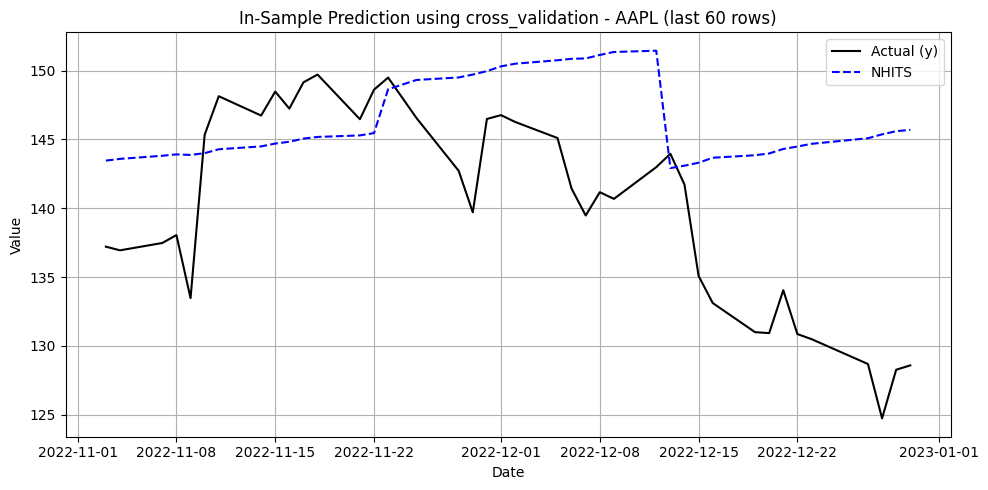

In [12]:
# ====================== SINGLE CODE CELL START ======================
import pandas as pd
import matplotlib.pyplot as plt

# Nixtla imports
from neuralforecast import NeuralForecast
from neuralforecast.models import NHITS
# (Optional) If you want quantiles, from neuralforecast.losses.pytorch import MQLoss

# 1) Load your already-cleaned DataFrame from parquet
filtered_path = "filtered_features.parquet"
df_filtered = pd.read_parquet(filtered_path)

# Basic checks
if not all(x in df_filtered.columns for x in ['ds', 'unique_id', 'y']):
    raise ValueError("Parquet must have columns [ds, unique_id, y].")

# Convert ds to datetime if not already
df_filtered['ds'] = pd.to_datetime(df_filtered['ds'], errors='coerce')
if df_filtered['ds'].isna().any():
    raise ValueError("[Error] Some ds rows are NaT. Check for invalid date strings.")

print("[INFO] df_filtered sample:")
print(df_filtered.head(5), "\n")

# 2) Choose a forecasting frequency.
#    If your data has daily rows Mon-Fri only (i.e. stock data), freq='B' is common.
FREQ = 'B'

# 3) Initialize a model or multiple models
#    Adjust your horizon, input_size, training steps as needed
HORIZON = 14
model_nhits = NHITS(
    h=HORIZON,
    input_size=2*HORIZON,
    max_steps=200,        # Low for demonstration
    # If you want quantile forecasts, add: loss=MQLoss(), etc.
)

# 4) Create a NeuralForecast container & call cross_validation
nf = NeuralForecast(
    models=[model_nhits],
    freq=FREQ
)

print("[INFO] Running cross_validation(...) to get in-sample predictions.\n"
      "This approach ensures predicted timestamps overlap actual ds in historical data.\n")

# cross_validation arguments:
# - df: your dataset
# - n_windows: how many rolling windows?
# - h: forecast horizon for each window
# - step_size: how many steps to move the window each time?
# - refit: whether to refit the model each window. If refit=False,
#          the model trains once on the earliest portion and continues forward.

cv_df = nf.cross_validation(
    df=df_filtered,
    n_windows=3,
    # Instead of `h=14`, do val_size:
    val_size=14,
    step_size=14,
    refit=True,
)

print("\n=== cross_validation() returned DataFrame (head) ===")
print(cv_df.shape)
print(cv_df.head(10))

# Typically, cv_df contains columns:
#   [unique_id, ds, y, cutoff, NHITS-median, NHITS-lo-80, NHITS-lo-90, NHITS-hi-80, ...]
#   The exact naming depends on your model & config.

# 5) Visualize the in-sample predictions for one stock
#    We do not need to 'merge' because cross_validation() already includes 'y'.
stock_ids = cv_df['unique_id'].unique()
if len(stock_ids) == 0:
    print("[ERROR] No unique_id in cv_df; unexpected.")
else:
    first_stock = stock_ids[0]
    sub = cv_df[cv_df['unique_id'] == first_stock].copy()
    sub.sort_values('ds', inplace=True)

    # Nixtla typically names the median forecast f"{ModelName}-median"
    # For NHITS, it might be "NHITS" if no quantiles, or "NHITS-median" if quantiles.
    # Inspect cv_df.columns to confirm:
    col_candidates = [c for c in sub.columns if "NHITS" in c]
    print("\n[DEBUG] Forecast columns found:", col_candidates)

    # Let's assume 'NHITS-median' is the main forecast column (if MQLoss).
    # If you used a plain MSE or MAE, you might see just 'NHITS'.
    if 'NHITS-median' in sub.columns:
        forecast_col = 'NHITS-median'
    elif 'NHITS' in sub.columns:
        forecast_col = 'NHITS'
    else:
        print("[WARNING] Could not find 'NHITS' or 'NHITS-median' in columns!")
        forecast_col = None

    if forecast_col:
        # Plot last 60 historical rows (in-sample)
        zoom_sub = sub.iloc[-60:].copy()

        plt.figure(figsize=(10,5))
        plt.plot(zoom_sub['ds'], zoom_sub['y'], label="Actual (y)", color='black')
        plt.plot(zoom_sub['ds'], zoom_sub[forecast_col], label=forecast_col, linestyle='--', color='blue')
        plt.title(f"In-Sample Prediction using cross_validation - {first_stock} (last 60 rows)")
        plt.xlabel("Date")
        plt.ylabel("Value")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# ====================== SINGLE CODE CELL END ======================

### Evaluate Cross Validation Metrics

In [13]:
import numpy as np
import pandas as pd

###############################################################################
# 1) Define a helper function to compute MSE, MAE, sMAPE given a sub-DataFrame
###############################################################################
def compute_metrics(subdf, forecast_col="NHITS"):
    """
    subdf must contain columns ['y', forecast_col].
    Returns a dict with keys: ['MSE','MAE','sMAPE'].
    """
    y_true = subdf['y'].values
    y_pred = subdf[forecast_col].values

    # MSE
    mse_ = np.mean((y_true - y_pred) ** 2)

    # MAE
    mae_ = np.mean(np.abs(y_true - y_pred))

    # sMAPE (symmetric MAPE)
    # sMAPE = 2 * |y - y_pred| / (|y| + |y_pred|) * 100
    denom = np.abs(y_true) + np.abs(y_pred)
    smape_ = np.mean(
        np.where(denom != 0, 2.0 * np.abs(y_true - y_pred) / denom, 0)
    ) * 100.0

    return {"MSE": mse_, "MAE": mae_, "sMAPE": smape_}

###############################################################################
# 2) Group your cross-validation DataFrame by (cutoff, unique_id), compute metrics
###############################################################################
# Suppose cv_df is your cross-validation DataFrame from nf.cross_validation(...)
# with columns [unique_id, ds, cutoff, y, NHITS].
# If your forecast column is "Autoformer", rename `forecast_col` below as needed.

forecast_col = "NHITS"  # or "AutoNHITS", "Autoformer", etc.

# We'll group by (cutoff, unique_id) so each window & series gets measured individually.
grouped_metrics = (
    cv_df
    .groupby(["cutoff", "unique_id"], group_keys=False)
    .apply(lambda sub: pd.Series(compute_metrics(sub, forecast_col=forecast_col)))
    .reset_index()
)

print("=== Cross-validation metrics by (cutoff, unique_id) ===")
print(grouped_metrics.head(15))  # show a sample

###############################################################################
# 3) Optionally, compute summary stats (average) across all windows & series
###############################################################################
avg_metrics_all = grouped_metrics[["MSE","MAE","sMAPE"]].mean()
print("\n=== Overall Average Metrics (all windows, all series) ===")
print(avg_metrics_all)

###############################################################################
# 4) You could also average by cutoff or by unique_id separately
###############################################################################
# Example: average errors per cutoff window:
avg_by_cutoff = grouped_metrics.groupby("cutoff")[["MSE","MAE","sMAPE"]].mean()
print("\n=== Average Metrics by cutoff (window) ===")
print(avg_by_cutoff)

# Example: average errors per series:
avg_by_uid = grouped_metrics.groupby("unique_id")[["MSE","MAE","sMAPE"]].mean()
print("\n=== Average Metrics by unique_id (series) ===")
print(avg_by_uid)

=== Cross-validation metrics by (cutoff, unique_id) ===
       cutoff unique_id          MSE        MAE      sMAPE
0  2022-11-02      AAPL    25.472292   4.435405   3.107656
1  2022-11-02      MSFT   278.702688  14.860226   6.527068
2  2022-11-02       SPY   208.406199  12.520837   3.348175
3  2022-11-02      TSLA  1004.444775  28.433259  14.177600
4  2022-11-22      AAPL    56.439599   6.713902   4.585342
5  2022-11-22      MSFT    22.463797   4.142158   1.692334
6  2022-11-22       SPY    46.683242   6.124880   1.579422
7  2022-11-22      TSLA   195.596912  11.824577   6.605739
8  2022-12-12      AAPL   176.913555  12.055431   8.777120
9  2022-12-12      MSFT    63.012933   7.367791   3.050028
10 2022-12-12       SPY   175.360017  12.232722   3.229237
11 2022-12-12      TSLA  1450.718196  33.427182  22.603184

=== Overall Average Metrics (all windows, all series) ===
MSE      308.684517
MAE       12.844864
sMAPE      6.606909
dtype: float64

=== Average Metrics by cutoff (window) ===

<ipython-input-13-46ba92870a6b>:43: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda sub: pd.Series(compute_metrics(sub, forecast_col=forecast_col)))


<ipython-input-14-c4b5e546e66f>:40: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda sub: pd.Series(compute_metrics(sub, forecast_col=forecast_col)))


=== Cross-validation metrics by (cutoff, unique_id) ===
       cutoff unique_id          MSE        MAE      sMAPE
0  2022-11-02      AAPL    25.472292   4.435405   3.107656
1  2022-11-02      MSFT   278.702688  14.860226   6.527068
2  2022-11-02       SPY   208.406199  12.520837   3.348175
3  2022-11-02      TSLA  1004.444775  28.433259  14.177600
4  2022-11-22      AAPL    56.439599   6.713902   4.585342
5  2022-11-22      MSFT    22.463797   4.142158   1.692334
6  2022-11-22       SPY    46.683242   6.124880   1.579422
7  2022-11-22      TSLA   195.596912  11.824577   6.605739
8  2022-12-12      AAPL   176.913555  12.055431   8.777120
9  2022-12-12      MSFT    63.012933   7.367791   3.050028
10 2022-12-12       SPY   175.360017  12.232722   3.229237
11 2022-12-12      TSLA  1450.718196  33.427182  22.603184


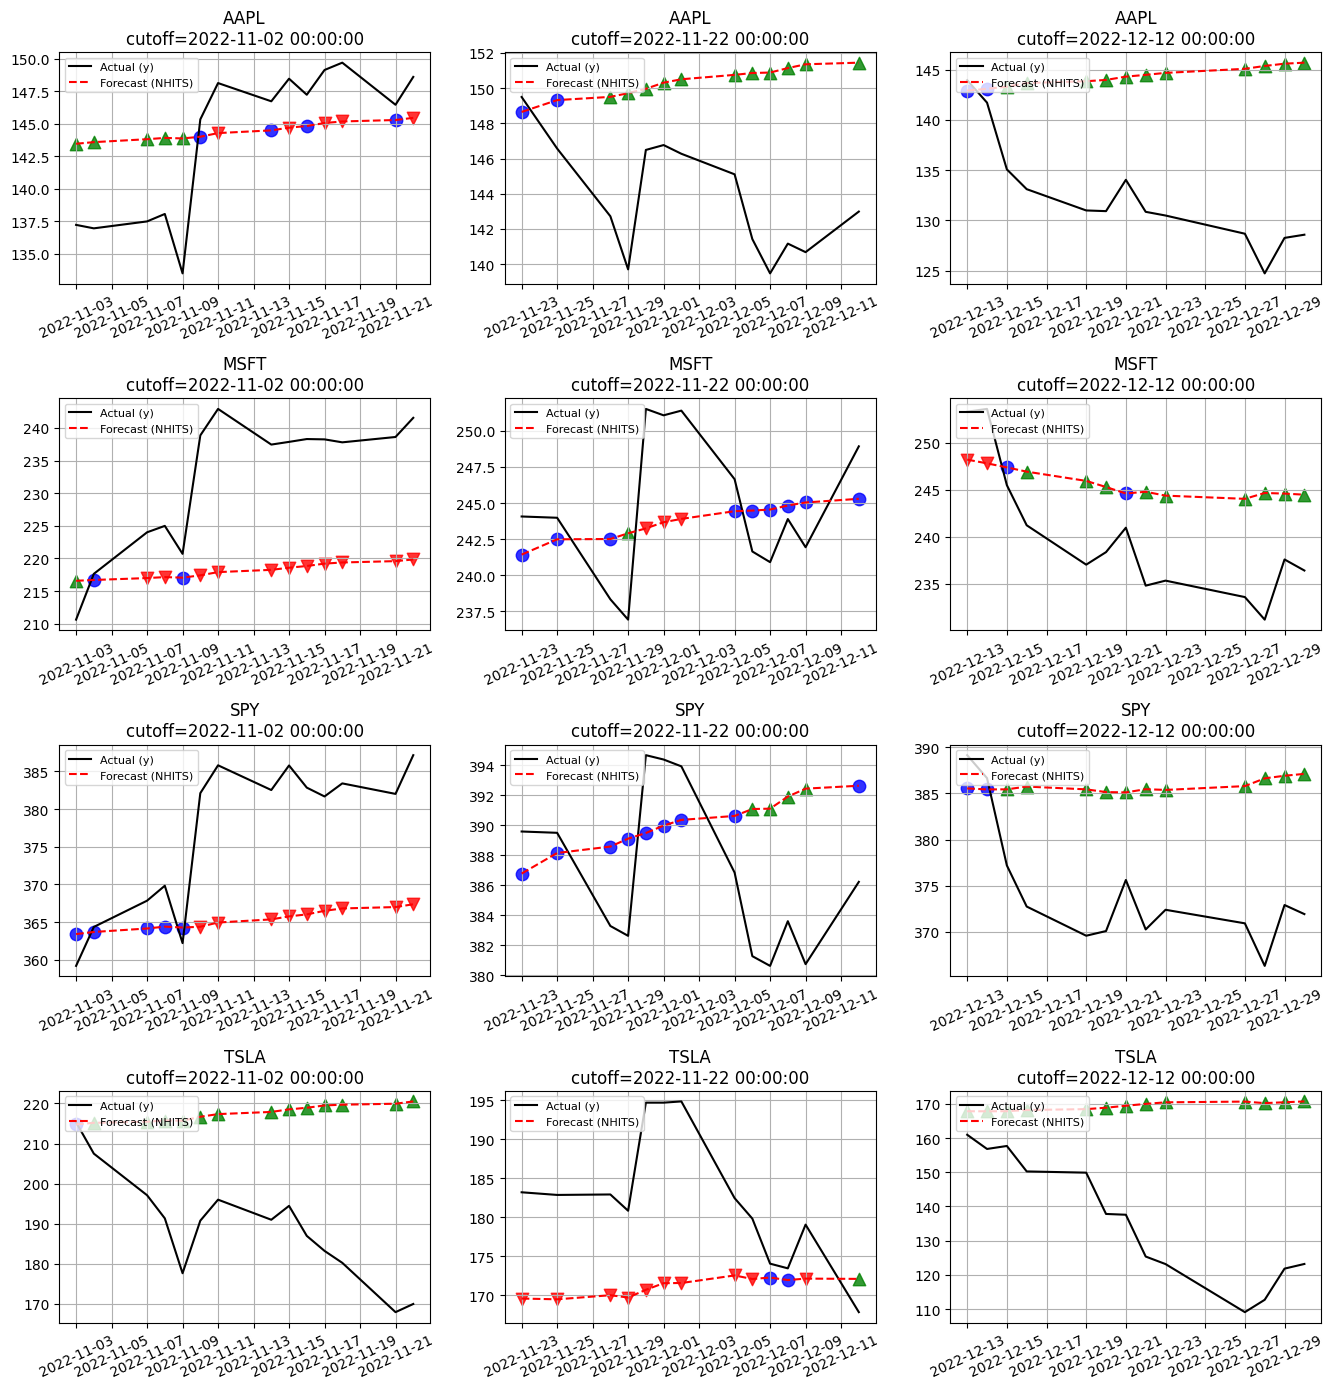

In [14]:
# ================== CROSS-VALIDATION VISUALIZATION CELL ==================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

###############################################################################
# 1) Helper: compute MSE, MAE, sMAPE for each (cutoff, unique_id)
###############################################################################
def compute_metrics(subdf, forecast_col="NHITS"):
    """
    subdf must contain ['y', forecast_col].
    Returns a dict with keys ['MSE','MAE','sMAPE'].
    """
    y_true = subdf['y'].values
    y_pred = subdf[forecast_col].values

    # -- MSE --
    mse_ = np.mean((y_true - y_pred) ** 2)
    # -- MAE --
    mae_ = np.mean(np.abs(y_true - y_pred))
    # -- sMAPE --
    denom = np.abs(y_true) + np.abs(y_pred)
    smape_ = np.mean(
        np.where(denom != 0, 2.0 * np.abs(y_true - y_pred) / denom, 0)
    ) * 100.0

    return {"MSE": mse_, "MAE": mae_, "sMAPE": smape_}

###############################################################################
# 2) Example: compute per-(cutoff, unique_id) metrics from cross-validation df
###############################################################################
# - Suppose your cross-validation DataFrame is in `cv_df` with columns:
#   [unique_id, ds, cutoff, y, NHITS, ...]
# - We'll choose a forecast_col to examine:
forecast_col = "NHITS"  # e.g. "Autoformer", "AutoNHITS-median", etc.

grouped_metrics = (
    cv_df
    .groupby(["cutoff", "unique_id"], group_keys=False)
    .apply(lambda sub: pd.Series(compute_metrics(sub, forecast_col=forecast_col)))
    .reset_index()
)
print("=== Cross-validation metrics by (cutoff, unique_id) ===")
print(grouped_metrics.head(12))

###############################################################################
# 3) Simple “buy / sell / hold” logic
#    (just an example, you can adapt thresholds or logic)
###############################################################################
def get_signal(row, threshold_up=0.02, threshold_down=-0.02):
    """
    Example logic:
      - If forecasted return >= +2% => "buy"
      - If forecasted return <= -2% => "sell"
      - otherwise => "hold"

    We'll say 'forecasted return' = (forecast - y) / y
    """
    # actual price:
    actual = row["y"]
    # forecast:
    pred   = row[forecast_col]
    if actual == 0:
        return "hold"  # fallback if price = 0
    pct_diff = (pred - actual) / (actual + 1e-9)  # avoid div0
    if pct_diff >= threshold_up:
        return "buy"
    elif pct_diff <= threshold_down:
        return "sell"
    else:
        return "hold"

cv_df_copy = cv_df.copy()
cv_df_copy["signal"] = cv_df_copy.apply(get_signal, axis=1)

###############################################################################
# 4) Visualization with standard matplotlib markers for buy/sell/hold
###############################################################################
# We'll define a small helper to pick marker & color based on the signal:
def get_marker_and_color(sig):
    """
    Returns (marker, color) for buy/sell/hold signals, using only native matplotlib shapes.
      - '^' = triangle_up
      - 'v' = triangle_down
      - 'o' = circle
    """
    if sig == "buy":
        return "^", "green"
    elif sig == "sell":
        return "v", "red"
    else:
        return "o", "blue"  # default hold

# Build a grid: rows = unique_ids, columns = cutoffs
unique_cutoffs = sorted(cv_df_copy['cutoff'].unique())
unique_ids     = sorted(cv_df_copy['unique_id'].unique())

fig, axes = plt.subplots(
    nrows=len(unique_ids),
    ncols=len(unique_cutoffs),
    figsize=(4.5 * len(unique_cutoffs), 3.5 * len(unique_ids)),
    sharex=False,
    sharey=False
)

# If we have just 1 row or 1 column, fix the shape so indexing is consistent
if len(unique_ids) == 1 and len(unique_cutoffs) == 1:
    axes = np.array([[axes]])
elif len(unique_ids) == 1:
    axes = np.array([axes])               # shape => (1, n_cutoffs)
elif len(unique_cutoffs) == 1:
    axes = np.array([[ax] for ax in axes])# shape => (n_ids, 1)

for i, uid in enumerate(unique_ids):
    for j, cut in enumerate(unique_cutoffs):
        ax = axes[i, j]
        # Filter data for this (uid, cutoff)
        sub = cv_df_copy.loc[
            (cv_df_copy["unique_id"] == uid) & (cv_df_copy["cutoff"] == cut)
        ].copy()
        if sub.empty:
            ax.set_title(f"{uid} | cutoff={cut}\n(No data)")
            ax.axis("off")
            continue

        # Sort by ds for neat plotting
        sub.sort_values("ds", inplace=True)

        # Plot lines: actual y in black, forecast in dashed red
        ax.plot(sub["ds"], sub["y"],     label="Actual (y)", color="black")
        ax.plot(sub["ds"], sub[forecast_col],
                label=f"Forecast ({forecast_col})",
                color="red", linestyle="--")

        # Overlay signals as scatter points on the forecast line
        for idx, row in sub.iterrows():
            mark, col = get_marker_and_color(row["signal"])
            ax.scatter(x=row["ds"], y=row[forecast_col],
                       marker=mark, c=col, s=80, alpha=0.8)

        ax.set_title(f"{uid}\ncutoff={cut}")
        ax.legend(fontsize=8, loc='upper left')
        ax.grid(True)
        # Optionally rotate x-ticks
        for label in ax.get_xticklabels():
            label.set_rotation(25)

plt.tight_layout()
plt.show()
# ================== END CELL ==================

# NHITS, AutoFormer, PatchTST, iTransformer, FEDformer with Parquet & Backtesting

### Prep

In [5]:
!pip install yfinance neuralforecast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.8/256.8 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.6/275.6 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.7 MB/s eta 0:00:00


### Train

INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


[INFO] filter_features.parquet loaded: shape=(3024, 32)
          ds unique_id          y       High        Low       Open     Volume  \
0 2020-01-02      AAPL  72.796005  72.856598  71.545372  71.799858  135480400   
1 2020-01-03      AAPL  72.088295  72.851761  71.862892  72.020432  146322800   
2 2020-01-06      AAPL  72.662697  72.701477  70.953987  71.206055  118387200   

   daily_return  range_pct  volume_spike  ...      pca_1      pca_2     pca_3  \
0     -0.009769   0.018012      0.784781  ... -48.171083  22.515543  3.510418   
1     -0.009769   0.013717      0.784781  ... -48.193905  22.474401  3.477277   
2      0.007936   0.024049      0.784781  ... -42.941880  19.865257  3.101304   

      pca_4     pca_5     pca_6     pca_7     pca_8     pca_9    pca_10  
0 -1.067293 -0.563925 -0.059356  0.001160  0.015263  0.008877  0.013363  
1 -1.068749 -0.564001 -0.060474 -0.007777 -0.006951 -0.003283  0.014268  
2 -1.076064 -0.558101 -0.057768  0.009834  0.027444  0.028358  0.010467 

INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 2.4 M  | train
-------------------------------------------------------
2.4 M     Trainable params
0         Non-trainable params
2.4 M     Total params
9.798     Total estimated model params size (MB)
34        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=200` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type          | Params | Mode 
--------------------------------------------------------
0 | loss          | MAE           | 0      | train
1 | padder_train  | ConstantPad1d | 0      | train
2 | scaler        | TemporalNorm  | 0      | train
3 | decomp        | SeriesDecomp  | 0      | train
4 | enc_embedding | DataEmbedding | 384    | train
5 | dec_embedding | DataEmbedding | 384    | train
6 | encoder       | Encoder       | 148 K  | train
7 | decoder       | Decoder       | 141 K  | train
-----------------

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=200` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type              | Params | Mode 
-----------------------------------------------------------
0 | loss         | MAE               | 0      | train
1 | padder_train | ConstantPad1d     | 0      | train
2 | scaler       | TemporalNorm      | 0      | train
3 | model        | PatchTST_backbone | 405 K  | train
-----------------------------------------------------------
405 K     Trainable params
3         Non-trainable params
405 K     Total params
1.622     Total estimated model params size (MB)
90        Mod

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=200` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type          | Params | Mode 
--------------------------------------------------------
0 | loss          | MAE           | 0      | train
1 | padder_train  | ConstantPad1d | 0      | train
2 | scaler        | TemporalNorm  | 0      | train
3 | decomp        | SeriesDecomp  | 0      | train
4 | enc_embedding | DataEmbedding | 384    | train
5 | dec_embedding | DataEmbedding | 384    | train
6 | encoder       | Encoder       | 177 K  | train
7 | decoder       | Decoder       | 198 K  | train
-----------------

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=200` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type                   | Params | Mode 
-----------------------------------------------------------------
0 | loss          | MAE                    | 0      | train
1 | padder        | ConstantPad1d          | 0      | train
2 | scaler        | TemporalNorm           | 0      | train
3 | enc_embedding | DataEmbedding_inverted | 14.8 K | train
4 | encoder       | TransEncoder           | 6.3 M  | train
5 | projector     | Linear                 | 7.2 K  | train
-----------------------------------------------

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=200` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 2.4 M  | train
-------------------------------------------------------
2.4 M     Trainable params
0         Non-trainable params
2.4 M     Total params
9.798     Total estimated model params size (MB)
34        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=200` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type          | Params | Mode 
--------------------------------------------------------
0 | loss          | MAE           | 0      | train
1 | padder_train  | ConstantPad1d | 0      | train
2 | scaler        | TemporalNorm  | 0      | train
3 | decomp        | SeriesDecomp  | 0      | train
4 | enc_embedding | DataEmbedding | 384    | train
5 | dec_embedding | DataEmbedding | 384    | train
6 | encoder       | Encoder       | 148 K  | train
7 | decoder       | Decoder       | 141 K  | train
-----------------

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=200` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type              | Params | Mode 
-----------------------------------------------------------
0 | loss         | MAE               | 0      | train
1 | padder_train | ConstantPad1d     | 0      | train
2 | scaler       | TemporalNorm      | 0      | train
3 | model        | PatchTST_backbone | 405 K  | train
-----------------------------------------------------------
405 K     Trainable params
3         Non-trainable params
405 K     Total params
1.622     Total estimated model params size (MB)
90        Mod

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=200` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type          | Params | Mode 
--------------------------------------------------------
0 | loss          | MAE           | 0      | train
1 | padder_train  | ConstantPad1d | 0      | train
2 | scaler        | TemporalNorm  | 0      | train
3 | decomp        | SeriesDecomp  | 0      | train
4 | enc_embedding | DataEmbedding | 384    | train
5 | dec_embedding | DataEmbedding | 384    | train
6 | encoder       | Encoder       | 177 K  | train
7 | decoder       | Decoder       | 198 K  | train
-----------------

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=200` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type                   | Params | Mode 
-----------------------------------------------------------------
0 | loss          | MAE                    | 0      | train
1 | padder        | ConstantPad1d          | 0      | train
2 | scaler        | TemporalNorm           | 0      | train
3 | enc_embedding | DataEmbedding_inverted | 14.8 K | train
4 | encoder       | TransEncoder           | 6.3 M  | train
5 | projector     | Linear                 | 7.2 K  | train
-----------------------------------------------

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=200` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

[INFO] cross_validation completed. df_cv shape: (104, 9)
  unique_id         ds     cutoff       NHITS  Autoformer    PatchTST  \
0      AAPL 2022-11-23 2022-11-22  148.833633  142.514725  149.510056   
1      AAPL 2022-11-25 2022-11-22  149.071335  153.929489  149.788528   
2      AAPL 2022-11-28 2022-11-22  149.107422  162.920471  148.818604   
3      AAPL 2022-11-29 2022-11-22  149.099365  166.705414  146.715820   
4      AAPL 2022-11-30 2022-11-22  149.254105  170.399460  146.888794   

    FEDformer  iTransformer           y  
0  147.340683    143.840775  149.497910  
1  147.085648    146.544922  146.568695  
2  147.125412    146.550766  142.719193  
3  146.700317    146.385117  139.700912  
4  146.791458    146.199158  146.489517  

[DEBUG] Found forecast columns in df_cv: ['NHITS', 'Autoformer', 'PatchTST', 'FEDformer', 'iTransformer']

=== Cross-Validation Error Metrics (Table) ===
Model              |   MSE       MAE       sMAPE(%)
NHITS             |   283.7183    12.1929    

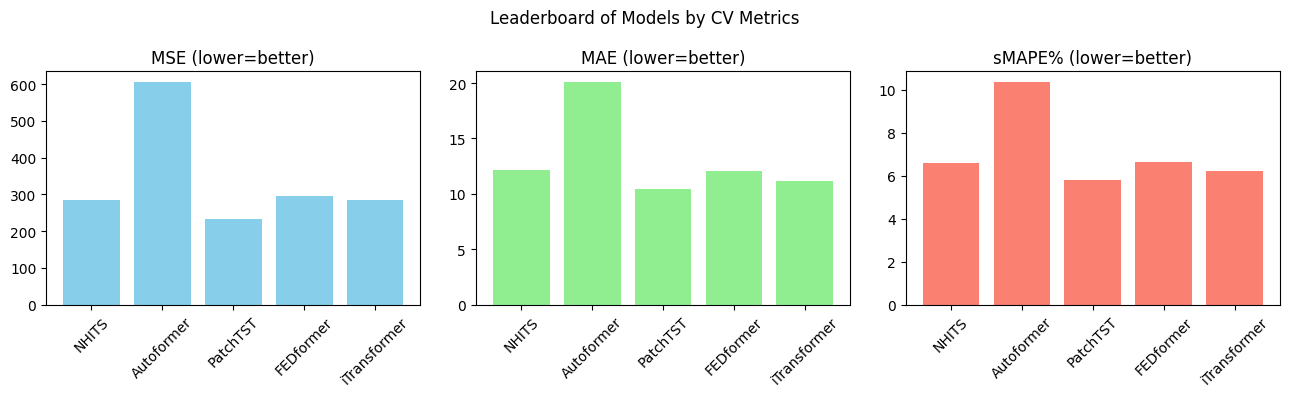

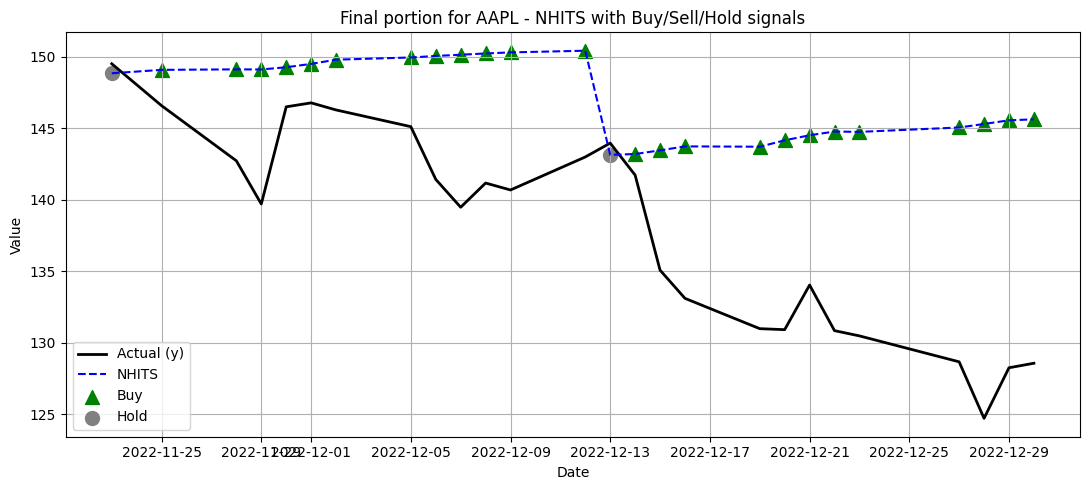

[INFO] All done!


In [36]:
# ===================== SINGLE CODE CELL START =====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Nixtla library imports
from neuralforecast import NeuralForecast
from neuralforecast.models import NHITS, Autoformer, PatchTST, FEDformer, iTransformer
from neuralforecast.losses.pytorch import MAE

# 0) Load or verify your previously-cleaned DataFrame with columns [ds, unique_id, y, ...]
FILTERED_PARQUET = "filtered_features.parquet"
df_filtered = pd.read_parquet(FILTERED_PARQUET)

# Basic checks for columns
required_cols = {"ds", "unique_id", "y"}
if not required_cols.issubset(df_filtered.columns):
    raise ValueError(f"DataFrame must have columns {required_cols}.")

# Convert ds to datetime if not already
df_filtered["ds"] = pd.to_datetime(df_filtered["ds"], errors="coerce")
if df_filtered["ds"].isna().any():
    raise ValueError("Some rows in 'ds' are invalid dates (NaT).")

print(f"[INFO] filter_features.parquet loaded: shape={df_filtered.shape}")
print(df_filtered.head(3))

# 1) Define how many distinct series we have, needed by iTransformer
n_series_count = df_filtered["unique_id"].nunique()
print(f"[INFO] n_series_count = {n_series_count} (for iTransformer).")

# 2) Cross-validation parameters
FREQ = "B"      # Use 'B' for business daily, or 'D' for daily
HORIZON = 14
N_WINDOWS = 2
VAL_SIZE = 14
STEP_SIZE = 14

# 3) Instantiate multiple models
#    Minimal hyperparams for demonstration. Adjust as needed.
model_nhits = NHITS(
    h=HORIZON,
    input_size=HORIZON*2,
    max_steps=200,
    loss=MAE(),
    alias="NHITS"  # Tag for clarity
)

model_autoformer = Autoformer(
    h=HORIZON,
    input_size=HORIZON*2,
    max_steps=200,
    loss=MAE(),
    #n_heads=4,
    #d_model=128,
    alias="Autoformer"
)

model_patchtst = PatchTST(
    h=HORIZON,
    input_size=HORIZON*2,
    max_steps=200,
    loss=MAE(),
    patch_len=16,
    stride=8,
    alias="PatchTST"
)

model_fedformer = FEDformer(
    h=HORIZON,
    input_size=HORIZON*2,
    max_steps=200,
    loss=MAE(),
    #n_heads=4,
    #d_model=128,
    alias="FEDformer"
)

model_itransformer = iTransformer(
    n_series=n_series_count,  # CRITICAL
    h=HORIZON,
    input_size=HORIZON*2,
    max_steps=200,
    loss=MAE(),
    n_heads=4,
    #d_model=128,
    alias="iTransformer"
)

# Build the NeuralForecast container
nf = NeuralForecast(
    models=[
        model_nhits,
        model_autoformer,
        model_patchtst,
        model_fedformer,
        model_itransformer
    ],
    freq=FREQ
)

print(f"[INFO] cross_validation on {n_series_count} series, "
      f"n_windows={N_WINDOWS}, val_size={VAL_SIZE}, step_size={STEP_SIZE}.\n")

# 4) Cross-validation
df_cv = nf.cross_validation(
    df=df_filtered,
    n_windows=N_WINDOWS,
    val_size=VAL_SIZE,
    step_size=STEP_SIZE,
    refit=True
)

print("[INFO] cross_validation completed. df_cv shape:", df_cv.shape)
print(df_cv.head())

# 5) Compute basic error metrics per model
def compute_metrics(sub_df, model_col):
    """Compute MSE, MAE, sMAPE for sub_df with columns: y, <model_col>."""
    y_true = sub_df["y"].values
    y_pred = sub_df[model_col].values

    # MSE
    mse = np.mean((y_true - y_pred) ** 2)
    # MAE
    mae = np.mean(np.abs(y_true - y_pred))
    # sMAPE
    denom = np.abs(y_true) + np.abs(y_pred)
    smape = np.mean(np.where(denom != 0, 2.0 * np.abs(y_true - y_pred)/denom, 0)) * 100.0
    return mse, mae, smape

# Identify which columns belong to which model
# Nixtla's cross_validation typically returns columns named exactly by 'alias' if loss=MAE,
# or 'alias-median' if using quantile losses. We'll see which appear:
all_cols = df_cv.columns
model_cols = []
for alias_name in ["NHITS", "Autoformer", "PatchTST", "FEDformer", "iTransformer"]:
    # Check if exact alias_name is in df_cv; if not, check if alias_name+'-median'
    if alias_name in all_cols:
        model_cols.append(alias_name)
    elif alias_name + "-median" in all_cols:
        model_cols.append(alias_name + "-median")

print("\n[DEBUG] Found forecast columns in df_cv:", model_cols)

# 6) Summarize metrics
metrics_result = []
for mc in model_cols:
    sub_df = df_cv.dropna(subset=[mc])
    if len(sub_df) == 0:
        continue
    mse_, mae_, smape_ = compute_metrics(sub_df, mc)
    metrics_result.append((mc, mse_, mae_, smape_))

print("\n=== Cross-Validation Error Metrics (Table) ===")
print("Model              |   MSE       MAE       sMAPE(%)")
for (mc, mse_, mae_, smape_) in metrics_result:
    print(f"{mc:18s}| {mse_:10.4f} {mae_:10.4f} {smape_:10.3f}")

# 7) Graphical leaderboard (bar chart for MSE, MAE, sMAPE)
if metrics_result:
    # Create dictionaries for each metric
    models_ = [res[0] for res in metrics_result]
    mses_   = [res[1] for res in metrics_result]
    maes_   = [res[2] for res in metrics_result]
    smapes_ = [res[3] for res in metrics_result]

    fig, axes = plt.subplots(1, 3, figsize=(13, 4))

    # MSE bar
    axes[0].bar(models_, mses_, color='skyblue')
    axes[0].set_title("MSE (lower=better)")
    axes[0].tick_params(axis='x', rotation=45)

    # MAE bar
    axes[1].bar(models_, maes_, color='lightgreen')
    axes[1].set_title("MAE (lower=better)")
    axes[1].tick_params(axis='x', rotation=45)

    # sMAPE bar
    axes[2].bar(models_, smapes_, color='salmon')
    axes[2].set_title("sMAPE% (lower=better)")
    axes[2].tick_params(axis='x', rotation=45)

    fig.suptitle("Leaderboard of Models by CV Metrics")
    plt.tight_layout()
    plt.show()

# 8) Example final plot for ONE model with naive buy/sell/hold markers
#    We'll pick the first ID. We'll pick e.g. "NHITS" as the demonstration model.
if len(df_cv["unique_id"].unique()) > 0 and len(model_cols) > 0:
    # pick the first ID
    first_id = df_cv["unique_id"].unique()[0]
    # pick the first model col (or whichever you want)
    chosen_model_col = model_cols[0]
    sub_plot = df_cv[df_cv["unique_id"] == first_id].copy()
    sub_plot = sub_plot.dropna(subset=[chosen_model_col])
    sub_plot.sort_values("ds", inplace=True)

    # We'll look at last 40 points
    sub_plot = sub_plot.iloc[-40:].copy()
    if len(sub_plot) == 0:
        print("[WARNING] No rows to plot for the chosen model. Skipping buy/sell plot.")
    else:
        # Compute simple rule:
        # If (forecast - actual)/actual > +1% => 'Buy'
        # If < -1% => 'Sell'
        # else => 'Hold'
        actual = sub_plot["y"].values
        forecast = sub_plot[chosen_model_col].values
        pct_diff = np.where(actual != 0, (forecast - actual)/actual * 100.0, 0.0)
        signals = []
        for pdiff in pct_diff:
            if pdiff > 1.0:
                signals.append("Buy")
            elif pdiff < -1.0:
                signals.append("Sell")
            else:
                signals.append("Hold")
        sub_plot["signal"] = signals

        # Let's define markers
        marker_map = {"Buy": "^", "Sell": "v", "Hold": "o"}
        color_map  = {"Buy": "green", "Sell": "red", "Hold": "gray"}

        plt.figure(figsize=(11, 5))
        plt.plot(sub_plot["ds"], sub_plot["y"], label="Actual (y)", c="black", linewidth=2)
        plt.plot(sub_plot["ds"], sub_plot[chosen_model_col], label=chosen_model_col, linestyle="--", c="blue")

        # Scatter each type with different markers
        for sig_type in ["Buy", "Sell", "Hold"]:
            sig_df = sub_plot[sub_plot["signal"] == sig_type]
            plt.scatter(sig_df["ds"], sig_df[chosen_model_col],
                        marker=marker_map[sig_type],
                        color=color_map[sig_type],
                        s=100, label=sig_type if len(sig_df) > 0 else "")

        plt.title(f"Final portion for {first_id} - {chosen_model_col} with Buy/Sell/Hold signals")
        plt.xlabel("Date")
        plt.ylabel("Value")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()
else:
    print("[WARNING] Could not plot buy/sell signals - no data or no model columns found.")

print("[INFO] All done!")
# ===================== SINGLE CODE CELL END =====================

### Results & Graphics

[INFO] Found these forecast columns: ['NHITS', 'Autoformer', 'PatchTST', 'FEDformer', 'iTransformer']

=== Raw Metrics Table ===
       Model        MSE       MAE     sMAPE  Spearman    Sharpe    Brier
       NHITS 283.718341 12.192865  6.597579  0.897821 -0.183768 0.058252
  Autoformer 604.380225 20.058382 10.335487  0.925528 -0.263369 0.038835
    PatchTST 233.752735 10.464093  5.790462  0.925037 -0.176970 0.048544
   FEDformer 295.525288 12.030004  6.633859  0.868918 -0.180679 0.038835
iTransformer 284.199666 11.148351  6.237145  0.931289 -0.194802 0.058252

--- MSE (lower=better) LEADERBOARD ---
       Model        MSE
    PatchTST 233.752735
       NHITS 283.718341
iTransformer 284.199666
   FEDformer 295.525288
  Autoformer 604.380225


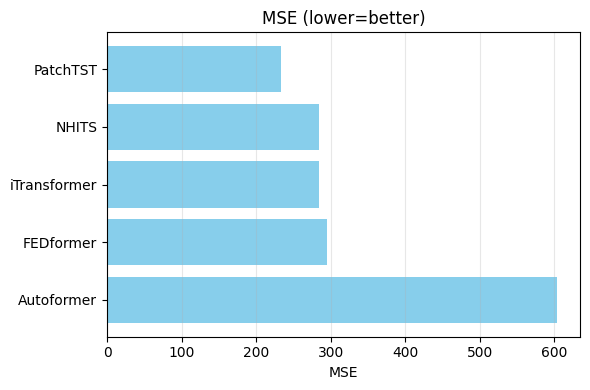


--- MAE (lower=better) LEADERBOARD ---
       Model       MAE
    PatchTST 10.464093
iTransformer 11.148351
   FEDformer 12.030004
       NHITS 12.192865
  Autoformer 20.058382


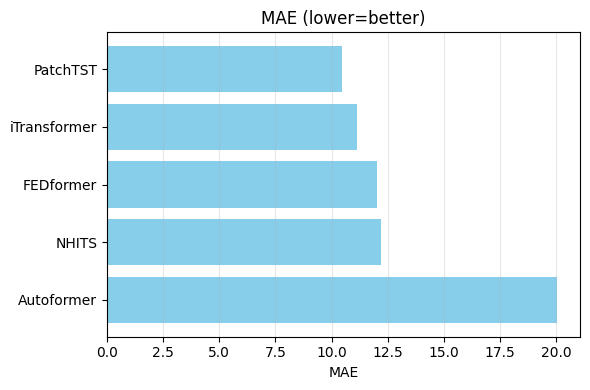


--- sMAPE (lower=better) LEADERBOARD ---
       Model     sMAPE
    PatchTST  5.790462
iTransformer  6.237145
       NHITS  6.597579
   FEDformer  6.633859
  Autoformer 10.335487


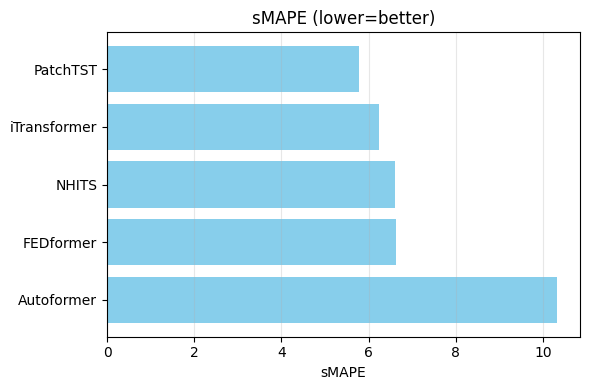


--- Spearman (higher=better) LEADERBOARD ---
       Model  Spearman
iTransformer  0.931289
  Autoformer  0.925528
    PatchTST  0.925037
       NHITS  0.897821
   FEDformer  0.868918


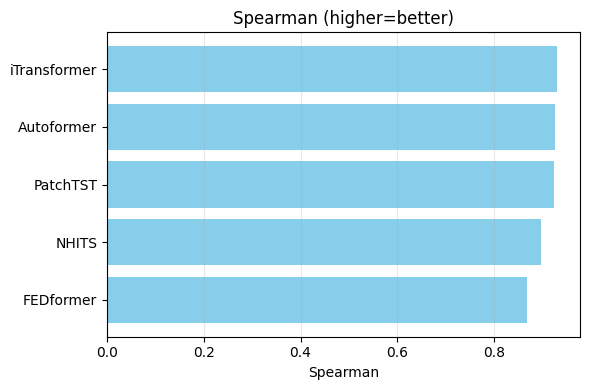


--- Sharpe (higher=better) LEADERBOARD ---
       Model    Sharpe
    PatchTST -0.176970
   FEDformer -0.180679
       NHITS -0.183768
iTransformer -0.194802
  Autoformer -0.263369


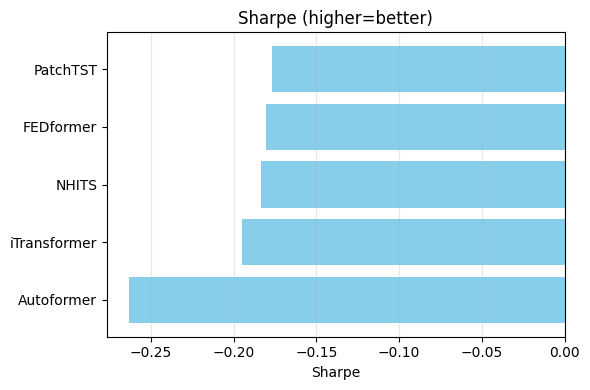


--- Brier (lower=better) LEADERBOARD ---
       Model    Brier
  Autoformer 0.038835
   FEDformer 0.038835
    PatchTST 0.048544
       NHITS 0.058252
iTransformer 0.058252


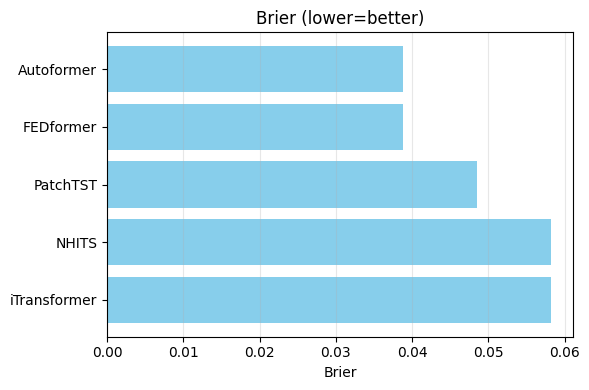


=== META-SCORE Leaderboard (desc) ===
       Model        MSE       MAE     sMAPE  Spearman    Sharpe    Brier  meta_score
    PatchTST 233.752735 10.464093  5.790462  0.925037 -0.176970 0.048544    0.944928
iTransformer 284.199666 11.148351  6.237145  0.931289 -0.194802 0.058252    0.831517
       NHITS 283.718341 12.192865  6.597579  0.897821 -0.183768 0.058252    0.725045
   FEDformer 295.525288 12.030004  6.633859  0.868918 -0.180679 0.038835    0.652764
  Autoformer 604.380225 20.058382 10.335487  0.925528 -0.263369 0.038835    0.322289


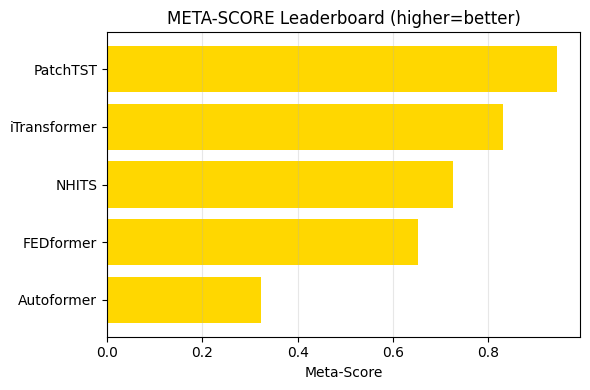

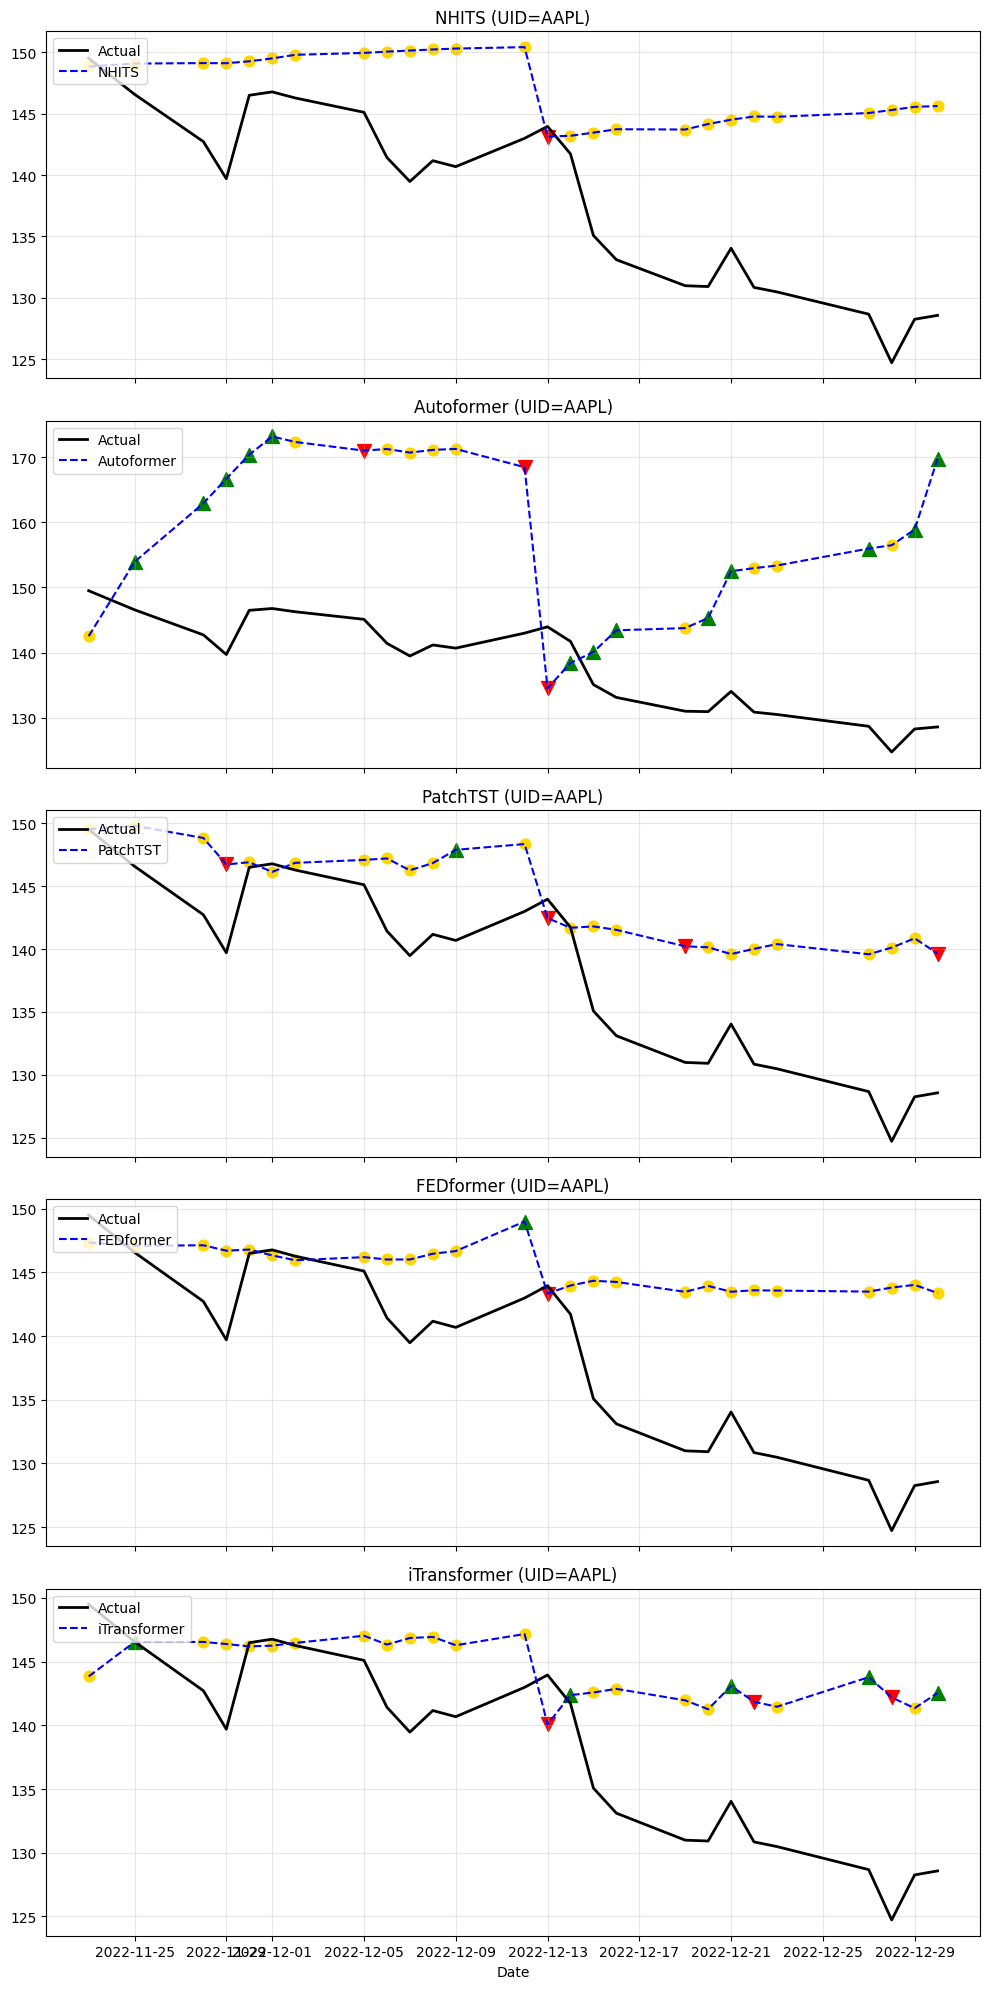

In [40]:
# ====================== SINGLE CODE CELL START ======================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

###############################################################################
# 0) Basic checks: we expect a DataFrame df_cv in the environment,
#    containing columns: [unique_id, ds, y, Model1, Model2, ...].
###############################################################################
assert 'df_cv' in globals(), "df_cv not found in global scope. Please define df_cv first."
if not isinstance(df_cv, pd.DataFrame):
    raise ValueError("df_cv must be a pandas DataFrame.")

required_cols = {'unique_id','ds','y'}
if not required_cols.issubset(df_cv.columns):
    raise ValueError(f"df_cv must contain columns {required_cols}.")

df_cv = df_cv.copy()
df_cv['ds'] = pd.to_datetime(df_cv['ds'], errors='coerce')
if df_cv['ds'].isna().any():
    raise ValueError("Some rows in 'ds' are not valid datetimes.")

# Identify forecast columns (exclude typical columns like 'unique_id','ds','y','cutoff'
# and exclude potential quantile suffixes).
excluded_cols = {'unique_id','ds','y','cutoff'}
model_cols = [c for c in df_cv.columns
              if c not in excluded_cols
              and not c.endswith(('-lo-80','-lo-90','-hi-80','-hi-90'))]

if len(model_cols) == 0:
    print("[WARNING] No model columns found in df_cv. Exiting.")
    raise SystemExit()

print("[INFO] Found these forecast columns:", model_cols)

###############################################################################
# 1) Define the metrics we want
###############################################################################
metrics_directions = {
    "MSE":      "lower",
    "MAE":      "lower",
    "sMAPE":    "lower",
    "Spearman": "higher",
    "Sharpe":   "higher",
    "Brier":    "lower",
}

def compute_metrics(sub_df, model_col="NHITS"):
    """Compute multiple metrics for (y, forecast).
       Returns dict: MSE, MAE, sMAPE, Spearman, Sharpe, Brier.
    """
    sub_df = sub_df.sort_values('ds')
    y_true = sub_df['y'].values
    y_pred = sub_df[model_col].values

    # MSE
    mse_ = np.mean((y_true - y_pred)**2)

    # MAE
    mae_ = np.mean(np.abs(y_true - y_pred))

    # sMAPE
    denom = np.abs(y_true) + np.abs(y_pred)
    smape_ = np.mean(
        np.where(denom!=0, 2.0*np.abs(y_true - y_pred)/denom, 0.0)
    ) * 100.0

    # Spearman
    try:
        sp_corr, _ = spearmanr(y_true, y_pred)
    except ValueError:
        sp_corr = np.nan

    # Sharpe ratio (toy approach)
    if len(y_pred) < 2:
        sharpe_ = np.nan
    else:
        pr_diff = []
        for i in range(1,len(y_pred)):
            pred_r = 0.0
            true_r = 0.0
            if y_pred[i-1]!=0:
                pred_r = (y_pred[i]-y_pred[i-1]) / abs(y_pred[i-1])
            if y_true[i-1]!=0:
                true_r= (y_true[i]-y_true[i-1]) / abs(y_true[i-1])
            pr_diff.append(pred_r - true_r)
        pr_diff = np.array(pr_diff)
        if pr_diff.size<2 or pr_diff.std()==0:
            sharpe_ = np.nan
        else:
            sharpe_ = pr_diff.mean()/pr_diff.std()

    # Brier score (toy approach: up/down classification mismatch)
    if len(y_pred) < 2:
        brier_ = np.nan
    else:
        pred_class = []
        true_class = []
        for i in range(1, len(y_pred)):
            pred_class.append(1 if y_pred[i]>=y_pred[i-1] else 0)
            true_class.append(1 if y_true[i]>=y_true[i-1] else 0)
        pred_class = np.array(pred_class)
        true_class = np.array(true_class)
        brier_ = np.mean((pred_class - true_class)**2)

    return {
        "MSE": mse_,
        "MAE": mae_,
        "sMAPE": smape_,
        "Spearman": sp_corr,
        "Sharpe": sharpe_,
        "Brier": brier_,
    }

###############################################################################
# 2) Summarize metrics in a table
###############################################################################
rows = []
for mcol in model_cols:
    stats = compute_metrics(df_cv, model_col=mcol)
    row = {"Model": mcol}
    row.update(stats)
    rows.append(row)

df_metrics = pd.DataFrame(rows)
metric_cols = list(metrics_directions.keys())  # ["MSE","MAE","sMAPE","Spearman","Sharpe","Brier"]

print("\n=== Raw Metrics Table ===")
print(df_metrics[["Model"]+metric_cols].to_string(index=False))

###############################################################################
# 3) Show multiple leaderboards (one per metric), marking (higher=better)/(lower=better).
###############################################################################
def print_leaderboard_for_metric(df, metric_name, direction):
    if direction=="higher":
        asc = False
        direction_txt = "(higher=better)"
    else:
        asc = True
        direction_txt = "(lower=better)"

    df_sorted = df.sort_values(metric_name, ascending=asc)
    print(f"\n--- {metric_name} {direction_txt} LEADERBOARD ---")
    print(df_sorted[["Model",metric_name]].to_string(index=False))

def bar_chart_for_metric(df, metric_name, direction):
    if direction=="higher":
        asc = False
    else:
        asc = True
    df_sorted = df.sort_values(metric_name, ascending=asc)
    plt.figure(figsize=(6,4))
    plt.barh(df_sorted["Model"], df_sorted[metric_name], color='skyblue')
    plt.title(f"{metric_name} {('(higher=better)' if not asc else '(lower=better)')}")
    plt.xlabel(metric_name)
    plt.gca().invert_yaxis()  # best at top if ascending
    plt.grid(True, axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

for m in metric_cols:
    print_leaderboard_for_metric(df_metrics, m, metrics_directions[m])
    bar_chart_for_metric(df_metrics, m, metrics_directions[m])

###############################################################################
# 4) Compute meta-metric:
#    Weighted approach:
#    - 50% Sharpe (higher=better)
#    - 30% Spearman (higher=better)
#    - The remaining 20% is split equally among MSE, MAE, sMAPE, Brier => 5% each
#
# We'll do min-max normalization with flips for "lower=better" metrics.
###############################################################################
df_metrics = df_metrics.copy()

lower_is_better = ["MSE","MAE","sMAPE","Brier"]
higher_is_better= ["Spearman","Sharpe"]

# min/max for each metric
mins, maxs = {}, {}
for c in metric_cols:
    arr = df_metrics[c].values
    valid = arr[~np.isnan(arr)]
    if valid.size==0:
        min_val=0
        max_val=1
    else:
        min_val=valid.min()
        max_val=valid.max()
        if min_val==max_val:
            max_val=min_val+1e-9
    mins[c] = min_val
    maxs[c] = max_val

# create score_*
for c in metric_cols:
    arr = df_metrics[c].values
    if c in lower_is_better:
        # 1 - (val-min)/(max-min)
        normed = 1.0 - (arr - mins[c])/(maxs[c] - mins[c])
    else:
        # (val-min)/(max-min)
        normed = (arr - mins[c])/(maxs[c] - mins[c])
    normed = np.clip(normed, 0,1)
    df_metrics[f"score_{c}"] = normed

df_metrics["meta_score"] = (
    0.50*df_metrics["score_Sharpe"]
  + 0.30*df_metrics["score_Spearman"]
  + 0.05*df_metrics["score_MSE"]
  + 0.05*df_metrics["score_MAE"]
  + 0.05*df_metrics["score_sMAPE"]
  + 0.05*df_metrics["score_Brier"]
)

df_meta = df_metrics.sort_values("meta_score", ascending=False)

print("\n=== META-SCORE Leaderboard (desc) ===")
cols_to_show = ["Model"] + metric_cols + ["meta_score"]
print(df_meta[cols_to_show].to_string(index=False))

# bar chart
plt.figure(figsize=(6,4))
plt.barh(df_meta["Model"], df_meta["meta_score"], color='gold')
plt.title("META-SCORE Leaderboard (higher=better)")
plt.xlabel("Meta-Score")
plt.gca().invert_yaxis()
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

###############################################################################
# 5) Plot forecasts vs. actual for the last N days, with buy/sell/hold markers
#    for each model on separate subplots (avoid clutter).
###############################################################################
PLOT_DAYS = 120  # adjust how many final days to visualize

unique_ids = df_cv["unique_id"].unique()
if len(unique_ids)==0:
    print("[ERROR] No series to plot. unique_ids is empty.")
else:
    # We'll just pick the first unique_id for demonstration
    example_uid = unique_ids[0]
    sub = df_cv[df_cv["unique_id"]==example_uid].copy()
    sub.sort_values("ds", inplace=True)

    # pick last PLOT_DAYS
    sub = sub.iloc[-PLOT_DAYS:].reset_index(drop=True)

    n_models = len(model_cols)
    fig, axes = plt.subplots(n_models, 1, figsize=(10, 4*n_models), sharex=True)

    if n_models==1:
        axes = [axes]

    for ax, mcol in zip(axes, model_cols):
        ax.plot(sub["ds"], sub["y"], label="Actual", color="black", linewidth=2)
        ax.plot(sub["ds"], sub[mcol], label=mcol, linestyle="--", color="blue")

        # buy/sell/hold logic
        signals = ["HOLD"]  # first row no prior
        for i in range(1,len(sub)):
            diff_val = sub.loc[i,mcol] - sub.loc[i-1,mcol]
            if diff_val>+1.0:
                signals.append("BUY")
            elif diff_val<-1.0:
                signals.append("SELL")
            else:
                signals.append("HOLD")

        sub[f"{mcol}_signal"] = signals

        # place markers
        for i in range(len(sub)):
            d = sub.loc[i,"ds"]
            p = sub.loc[i,mcol]
            s = sub.loc[i,f"{mcol}_signal"]
            if s=="BUY":
                ax.scatter(d,p, marker='^', c='green', s=100)
            elif s=="SELL":
                ax.scatter(d,p, marker='v', c='red',   s=100)
            else:
                ax.scatter(d,p, marker='o', c='gold',  s=60)

        ax.set_title(f"{mcol} (UID={example_uid})")
        ax.legend(loc='upper left')
        ax.grid(True, alpha=0.3)

    axes[-1].set_xlabel("Date")
    plt.tight_layout()
    plt.show()

# ====================== SINGLE CODE CELL END ======================